## Introduction:

In this competition, you are provided with 1.5 years of customers behavior data from Santander bank to predict what new products customers will purchase. 

The data starts at 2015-01-28 and has monthly records of products a customer has, such as "credit card", "savings account", etc. 

You will predict what additional products a customer will get in the last month, 2016-06-28, in addition to what they already have at 2016-05-28. These products are the columns named: ind_(xyz)_ult1, which are the columns #25 - #48 in the training data. You will predict what a customer will buy in addition to what they already had at 2016-05-28. 

Cometition Link ==> https://www.kaggle.com/c/santander-product-recommendation/data

Fork Notebooks ==> https://www.kaggle.com/apryor6/detailed-cleaning-visualization-python

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import timeit
import warnings
warnings.filterwarnings("ignore")
# pd.options.mode.chained_assignment = None 

## Analysis steps:

1. Data exploration 
2. Data cleaning, cleansing (including feature reduction) 
3. Modeling 

## Reading the data ..

The size of the data is about 1.3 GB ! .. 

Reading it as one unit using the traditional built in functions won't help ! .. 

Let's try to read them as chuncks .. 

In [2]:
reader = pd.read_csv('train_ver2.csv', chunksize=1000000, header=0)

In [3]:
reader.get_chunk()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0,6,1,...,0,0,0,0,0,0,0,0,0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0,35,1,...,0,0,0,0,0,0,0,0,0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0,35,1,...,0,0,0,0,0,0,0,0,0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0,35,1,...,0,0,0,0,0,0,0,0,0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0,35,1,...,0,0,0,0,0,0,0,0,0,0
5,2015-01-28,1050615,N,ES,H,23,2012-08-10,0,35,1,...,0,0,0,0,0,0,0,0,0,0
6,2015-01-28,1050616,N,ES,H,23,2012-08-10,0,35,1,...,0,0,0,0,0,0,0,0,0,0
7,2015-01-28,1050617,N,ES,H,23,2012-08-10,0,35,1,...,0,0,0,0,0,0,0,0,0,0
8,2015-01-28,1050619,N,ES,H,24,2012-08-10,0,35,1,...,0,0,0,0,0,0,0,0,0,0
9,2015-01-28,1050620,N,ES,H,23,2012-08-10,0,35,1,...,0,0,0,0,0,0,0,0,0,0


We are working only on 1000000 records (just for obtaining better performance) ..

Let's divide it to training and validation .. 

In [4]:
ntrain = reader.get_chunk()

In [5]:
ntrain.columns.to_series().groupby(ntrain.dtypes).groups

{dtype('int64'): ['ncodpers',
  'ind_ahor_fin_ult1',
  'ind_aval_fin_ult1',
  'ind_cco_fin_ult1',
  'ind_cder_fin_ult1',
  'ind_cno_fin_ult1',
  'ind_ctju_fin_ult1',
  'ind_ctma_fin_ult1',
  'ind_ctop_fin_ult1',
  'ind_ctpp_fin_ult1',
  'ind_deco_fin_ult1',
  'ind_deme_fin_ult1',
  'ind_dela_fin_ult1',
  'ind_ecue_fin_ult1',
  'ind_fond_fin_ult1',
  'ind_hip_fin_ult1',
  'ind_plan_fin_ult1',
  'ind_pres_fin_ult1',
  'ind_reca_fin_ult1',
  'ind_tjcr_fin_ult1',
  'ind_valo_fin_ult1',
  'ind_viv_fin_ult1',
  'ind_recibo_ult1'],
 dtype('float64'): ['ind_nuevo',
  'indrel',
  'indrel_1mes',
  'tipodom',
  'cod_prov',
  'ind_actividad_cliente',
  'renta',
  'ind_nomina_ult1',
  'ind_nom_pens_ult1'],
 dtype('O'): ['fecha_dato',
  'ind_empleado',
  'pais_residencia',
  'sexo',
  'age',
  'fecha_alta',
  'antiguedad',
  'ult_fec_cli_1t',
  'tiprel_1mes',
  'indresi',
  'indext',
  'conyuemp',
  'canal_entrada',
  'indfall',
  'nomprov',
  'segmento']}

## Null values inside each variable:

In [43]:
ntrain.isnull().any()

fecha_dato               False
ncodpers                 False
ind_empleado              True
pais_residencia           True
sexo                      True
age                      False
fecha_alta                True
ind_nuevo                 True
antiguedad               False
indrel                    True
ult_fec_cli_1t            True
indrel_1mes               True
tiprel_1mes               True
indresi                   True
indext                    True
conyuemp                  True
canal_entrada             True
indfall                   True
tipodom                   True
cod_prov                  True
nomprov                   True
ind_actividad_cliente     True
renta                     True
segmento                  True
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp

In [44]:
ntrain.isnull().sum()  ## number of NAs per column ..

fecha_dato                    0
ncodpers                      0
ind_empleado               8246
pais_residencia            8246
sexo                       8250
age                           0
fecha_alta                 8246
ind_nuevo                  8246
antiguedad                    0
indrel                     8246
ult_fec_cli_1t           998644
indrel_1mes                8246
tiprel_1mes                8246
indresi                    8246
indext                     8246
conyuemp                 999912
canal_entrada              8306
indfall                    8246
tipodom                    8246
cod_prov                  13421
nomprov                   13421
ind_actividad_cliente      8246
renta                    179166
segmento                   8327
ind_ahor_fin_ult1             0
ind_aval_fin_ult1             0
ind_cco_fin_ult1              0
ind_cder_fin_ult1             0
ind_cno_fin_ult1              0
ind_ctju_fin_ult1             0
ind_ctma_fin_ult1             0
ind_ctop

In [45]:
ntrain.age[1]

' 47'

Three data types exist .. 
Int, float and categorical data ..

In [46]:
ntrain["age"] = ntrain["age"].map(str.strip)

In [47]:
ntrain.age[1]

'47'

Let's calculate centeral tendancy measures and despersion measures for the numerical data ..


## 1. Age: 

In [48]:
ntrain.age.describe()

count     1000000
unique        115
top            23
freq        73419
Name: age, dtype: object

## 2. New customer Index:

In [49]:
ntrain.ind_nuevo.describe()

count    991754.000000
mean          0.008481
std           0.091701
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: ind_nuevo, dtype: float64

ind_nuebvo is the New customer Index. 1 if the customer registered in the last 6 months ..

In [50]:
ntrain.ind_nuevo.value_counts()

0    983343
1      8411
Name: ind_nuevo, dtype: int64

hence, it doesn't make sense to calculate the mean !! ..

Let's count the number of new customers instead ..

In [51]:
ntrain.age.value_counts().head(15)

23    73419
24    64833
22    55030
21    53752
25    38657
26    29731
27    23878
42    22617
43    22344
44    22092
41    22075
45    21129
40    21060
28    19842
46    19787
Name: age, dtype: int64

The majority of the bank's customers are youth with age >= 21 

This is just a reminder .. we are working only on a sample of data ..

Let's explore another variable ..

## 3. Customer seniority (in months)

In [52]:
ntrain.antiguedad.describe()

count     1000000
unique        249
top            12
freq        37474
Name: antiguedad, dtype: object

In [53]:
ntrain.antiguedad.value_counts().head(15)

     12    37474
     10    33836
     33    31632
     45    29130
      9    28761
     21    25060
     36    24370
     44    24020
     35    23774
     34    23593
     32    22038
     46    20491
     22    20361
      8    19087
     23    17764
Name: antiguedad, dtype: int64

## 4. indrel 	

1 (First/Primary), 99 (Primary customer during the month but not at the end of the month)

In [54]:
ntrain.indrel.describe()

count    991754.000000
mean          1.133993
std           3.621238
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          99.000000
Name: indrel, dtype: float64

In [55]:
ntrain.indrel.unique()

array([  1.,  nan,  99.])

It makes no sense to calculate its mean value .. and it already have either 1 or 99 .. 
NAs are there as well .. 

In [56]:
ntrain.indrel.value_counts()

1     990398
99      1356
Name: indrel, dtype: int64

## 5. tipodom:

- Addres type. 1 means primary address
- It doesn't seem to be useful, and the province code is not needed because the name of the province exists in nomprov ( Province name).

In [57]:
ntrain.tipodom.value_counts()

1    991754
Name: tipodom, dtype: int64

In [58]:
ntrain.nomprov.value_counts()

MADRID                    300282
BARCELONA                  84615
SEVILLA                    48249
VALENCIA                   46952
CORUÑA, A                  35788
MURCIA                     30909
MALAGA                     28617
ZARAGOZA                   25817
CADIZ                      24246
PONTEVEDRA                 23282
ALICANTE                   22356
ASTURIAS                   20340
VALLADOLID                 18547
PALMAS, LAS                17677
BADAJOZ                    16439
TOLEDO                     13706
SALAMANCA                  13537
BIZKAIA                    13339
GRANADA                    12361
CORDOBA                    11620
CACERES                    11244
CANTABRIA                  11194
HUELVA                     10774
CIUDAD REAL                 9488
ALBACETE                    8970
CASTELLON                   8225
BALEARS, ILLES              7866
BURGOS                      7434
OURENSE                     7333
LUGO                        7287
RIOJA, LA 

The majority of the customers are from MADRID

The value of (CORUÑA, A) is incorrect .. there was an error in the unicode character N .. 

We might fix it manually by removing the hat on its top .. 

In [59]:
ntrain.loc[ntrain.nomprov=="CORU\xc3\x91A, A","nomprov"] = "CORUNA, A"
ntrain.nomprov

0             VALLADOLID
1               VALENCIA
2                SEVILLA
3                SEVILLA
4                SEVILLA
5                CACERES
6               ALBACETE
7         BALEARS, ILLES
8                 HUELVA
9              CORUNA, A
10                CUENCA
11                HUELVA
12              ALBACETE
13                HUELVA
14                HUELVA
15                HUELVA
16                MALAGA
17                HUELVA
18                CUENCA
19                HUELVA
20               CORDOBA
21                CUENCA
22              ALICANTE
23                CUENCA
24                HUELVA
25                MADRID
26               SEVILLA
27              VALENCIA
28               SEVILLA
29            VALLADOLID
               ...      
999970            MALAGA
999971              LEON
999972            MADRID
999973            MADRID
999974            MADRID
999975            MADRID
999976            MALAGA
999977         CANTABRIA
999978            MADRID


In [60]:
len(ntrain.nomprov.unique())

53

54 unique value ! 

In [61]:
ntrain.cod_prov.value_counts()   ## customer address .. 

28    300282
8      84615
41     48249
46     46952
15     35788
30     30909
29     28617
50     25817
11     24246
36     23282
3      22356
33     20340
47     18547
35     17677
6      16439
45     13706
37     13537
48     13339
18     12361
14     11620
10     11244
39     11194
21     10774
13      9488
2       8970
12      8225
7       7866
9       7434
32      7333
27      7287
26      6408
17      6316
24      6143
31      6078
43      6061
25      5726
20      4923
16      4756
38      4675
23      4646
49      4198
4       4182
19      4045
34      3908
40      3163
5       3028
22      2986
1       2646
44      1846
42      1217
52       644
51       490
Name: cod_prov, dtype: int64

## 6. Renta: 
It is the Gross income of the household

In [62]:
ntrain.renta.describe()

count      820834.000000
mean       130724.095092
std        209368.262831
min          1202.730000
25%         67756.860000
50%         99882.570000
75%        152357.670000
max      28894395.510000
Name: renta, dtype: float64

In [63]:
len(ntrain.renta.unique())

398791

There are 9889 unique value in renta variable ..

In [64]:
ntrain.renta.value_counts()

451931.22    370
283325.67    126
463625.16    116
181042.20    115
488798.49     99
128318.52     99
127141.50     89
105260.88     86
132335.73     69
273387.54     65
104563.80     64
236690.34     64
227267.49     63
288997.44     59
218030.01     59
227397.72     58
174407.10     55
168733.62     54
135522.15     52
155930.43     52
163432.47     51
208961.79     51
111933.69     51
555605.55     50
104040.18     49
148736.19     47
288600.63     45
235476.72     44
47550.39      44
152601.99     43
            ... 
58004.40       1
89386.11       1
102680.58      1
294616.35      1
154168.23      1
93216.69       1
70148.46       1
126736.56      1
335819.79      1
130651.71      1
166049.55      1
43873.80       1
478172.67      1
59068.95       1
192876.75      1
141130.05      1
128334.84      1
62412.39       1
67340.88       1
84804.48       1
36292.38       1
544379.73      1
65279.10       1
91588.71       1
282604.59      1
159449.76      1
140515.23      1
95328.45      

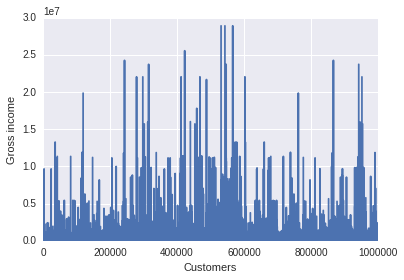

In [65]:
plt.plot(ntrain.renta)
plt.xlabel("Customers")
plt.ylabel("Gross income")

I think renta figure is not meaningfull .. we can plot hist instead .. !

## 7. Sexo and segmento:

There are other variables that contain missing values .. however, let's focus on those two variables cause they might have significant effect on the depend variable .. 

    sexo 	Customer's sex
    segmento 	segmentation: 
                01 - VIP
                02 - Individuals 
                03 - college graduated


In [66]:
ntrain.sexo.unique()

array(['H', 'V', nan], dtype=object)

the value of 1 might indicate typo ! as the sex either H or V .. 

In [67]:
ntrain.sexo.value_counts()

V    529343
H    462407
Name: sexo, dtype: int64

In [68]:
ntrain.segmento.value_counts()

02 - PARTICULARES     537617
03 - UNIVERSITARIO    411369
01 - TOP               42687
Name: segmento, dtype: int64

NAs are also there besides the value of 1 !

## Let's explore the whole variables at the same time .. 
    
instead of working on each seperately !

In [69]:
unique_ids   = pd.Series(ntrain["ncodpers"].unique())
limit_people = 1.2e4
unique_id = unique_ids.sample(n=limit_people)
ntrain = ntrain[ntrain.ncodpers.isin(unique_id)]
ntrain.describe()

,ncodpers,ind_nuevo,indrel,indrel_1mes,tipodom,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
count,19040.000000,18912.000000,18912.000000,18912,18912,18822.000000,18912.000000,15784.000000,19040,19040.000000,...,19040.000000,19040.000000,19040.000000,19040.000000,19040.000000,19040.000000,19040.000000,18975.000000,18975.000000,19040.000000
mean,850831.200158,0.009095,1.124365,1,1,26.678249,0.523001,130290.612006,0,0.000053,...,0.005777,0.007721,0.003099,0.052416,0.048214,0.023845,0.004202,0.058182,0.061080,0.139443
std,374011.416625,0.094934,3.488982,0,0,12.860620,0.499484,189600.963788,0,0.007247,...,0.075791,0.087529,0.055581,0.222870,0.214224,0.152569,0.064686,0.234093,0.239484,0.346418
min,15964.000000,0.000000,1.000000,1,1,1.000000,0.000000,8602.770000,0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,533603.750000,0.000000,1.000000,1,1,15.000000,0.000000,67693.380000,0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,954693.000000,0.000000,1.000000,1,1,28.000000,1.000000,98633.715000,0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1142828.250000,0.000000,1.000000,1,1,35.000000,1.000000,153165.750000,0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1389886.000000,1.000000,99.000000,1,1,52.000000,1.000000,11271366.450000,0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Check Null values:


## Let's explore the Date variables .. 

We have two data variables:
1. fecha_dato ==> The table is partitioned for this column
2. fecha_alta ==> The date in which the customer became as the first holder of a contract in the bank

In [70]:
ntrain["fecha_dato"] = pd.to_datetime(ntrain["fecha_dato"],format="%Y-%m-%d")
ntrain["fecha_alta"] = pd.to_datetime(ntrain["fecha_alta"],format="%Y-%m-%d")
ntrain["fecha_dato"].unique()

array(['2015-02-28T00:00:00.000000000', '2015-03-28T00:00:00.000000000',
       '2015-04-28T00:00:00.000000000'], dtype='datetime64[ns]')

In [71]:
ntrain["fecha_alta"].unique()

array(['2013-09-25T00:00:00.000000000', '2014-09-08T00:00:00.000000000',
       '2013-09-26T00:00:00.000000000', ...,
       '2015-04-29T00:00:00.000000000', '2006-07-11T00:00:00.000000000',
       '2011-12-25T00:00:00.000000000'], dtype='datetime64[ns]')

In [72]:
ntrain["fecha_dato"].isnull().any().any()

False

In [73]:
ntrain["fecha_alta"].isnull().any().any()

True

In [74]:
ntrain["fecha_dato"].describe()  # unique values are only two (only two table partitions)

count                   19040
unique                      3
top       2015-03-28 00:00:00
freq                    11975
first     2015-02-28 00:00:00
last      2015-04-28 00:00:00
Name: fecha_dato, dtype: object

In [75]:
ntrain["fecha_alta"].describe()

count                   18912
unique                   3916
top       2014-10-03 00:00:00
freq                      102
first     1995-01-16 00:00:00
last      2015-04-29 00:00:00
Name: fecha_alta, dtype: object

## Let's work on the categorical variables indicate customer status .. 

### 1. ind_actividad_cliente:
active/ inactive customer .. 

In [76]:
## customer indicator .. 
ntrain.ind_actividad_cliente.value_counts()

1    9891
0    9021
Name: ind_actividad_cliente, dtype: int64

Around 9485 active customer and 9076 inactive .. 

It already checked that it contains NAs .. however, let's make a double check before manipulating them ..

In [77]:
ntrain.ind_actividad_cliente.unique()

array([  0.,   1.,  nan])

In [78]:
ntrain.ind_actividad_cliente.isnull().any().any()

True

Null values are not there !! :S :S ..

## Manipulate Null values:

- If age < 18 or > 100 .. replace it with the mean value .. cuase this is illogical to have age values for bank clients outside this range 

- It is abserved that the age distribution is a bimodal .. hence, the manipulate the outliers by the mean values ! .. 

- Instead, we gonna divide the age plot into two sub-plots and fill in the outliers by the mean of each division (mean not median as it is almost normally distributed) ..

- The distribution of the age as well as manipulating NANs is shown at the graphical demonestration part below ..

In [79]:
ntrain.age.isnull().any().any()

False

## Great .. 
Null values are replaced with the mean value ..

Let's fill in the missing values for ind_nuevo variable that indicates the novelity of the customer .. 

Let's check the history of the customer who have null value and fill in his cell by 1 (defualt to treate him as novel customer)

In [80]:
ntrain.loc[ntrain["ind_nuevo"].isnull(),"ind_nuevo"] = 1

In [81]:
ntrain.ind_nuevo.isnull().any().any()

False

Great, missing values are filled in age and ind_nuevo variables ! .. 

Let's check antiguedad variable ..

In [82]:
ntrain.loc[ntrain.antiguedad < 0] 

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1


In [83]:
min(ntrain.antiguedad)

'      3'

No negative values are there and the minimum value is zero .. 

It doesn't contain NAs (as checked above) ..

Let's fill in the missing values for indrel variable .. It is more logical to fill in these values by the median .. ! 

In [84]:
ntrain.loc[ntrain["indrel"].isnull()] = ntrain.indrel.median()

In [85]:
ntrain.indrel.unique()

array([  1.,  99.])

In [86]:
ntrain.indrel.value_counts()

1     19016
99       24
Name: indrel, dtype: int64

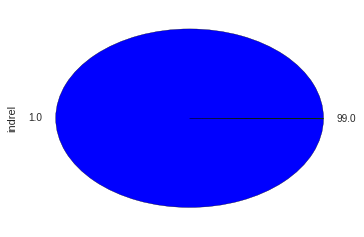

In [87]:
ntrain.indrel.value_counts().plot(x=None, y=None, kind = 'pie')

## Fill NAs for Date variables .. 
Let's check the date variables .. Null values should be replaced by the date of the median !

In [88]:
dates = ntrain.loc[:,"fecha_alta"].sort_values().reset_index()
dates

,index,fecha_alta
0,45963,1970-01-01 00:00:00.000000001
1,289128,1970-01-01 00:00:00.000000001
2,288776,1970-01-01 00:00:00.000000001
3,102228,1970-01-01 00:00:00.000000001
4,524995,1970-01-01 00:00:00.000000001
5,156223,1970-01-01 00:00:00.000000001
6,513320,1970-01-01 00:00:00.000000001
7,278481,1970-01-01 00:00:00.000000001
8,275162,1970-01-01 00:00:00.000000001
9,161879,1970-01-01 00:00:00.000000001


In [89]:
median_date = int(np.median(dates.index.values))
median_date  # the index of the median date

9519

In [90]:
ntrain.loc[ntrain.fecha_alta.isnull(),"fecha_alta"] = dates.loc[median_date,"fecha_alta"]

In [91]:
ntrain.fecha_alta.isnull().any().any()

False

## Dropping unnecessary variables:

We gonna delete Four variables:
1. tipodom: This is the promary address variable and this info. is already exists in other variables
2. cod_prov: The name of the province exists in nomprov (Province name)
3. ult_fec_cli_1t: Last date as primary customer, Almost all its data is missing (sparse variable)
4. conyuemp : Spouse index, almost all its data is missing (sparse variable) 

In [92]:
ntrain.drop(["tipodom","cod_prov", "ult_fec_cli_1t", "conyuemp"],axis=1,inplace=True)

In [93]:
ntrain

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
4,2015-02-28,1183243,N,ES,V,22,2013-09-25,0,22,1,...,0,0,0,0,0,0,0,0,0,0
70,2015-02-28,1183460,N,ES,V,21,2013-09-25,0,22,1,...,0,0,0,0,0,0,0,0,0,0
165,2015-02-28,1182980,N,ES,H,21,2013-09-25,0,22,1,...,0,0,0,0,0,0,0,0,0,0
166,2015-02-28,1182979,N,ES,V,24,2014-09-08,0,10,1,...,0,0,0,0,0,0,0,0,0,0
193,2015-02-28,1183480,N,ES,H,25,2013-09-25,0,22,1,...,0,0,0,0,0,0,0,0,0,0
209,2015-02-28,1183136,N,ES,V,21,2013-09-25,0,22,1,...,0,0,0,0,0,0,0,0,0,0
296,2015-02-28,1183808,N,ES,H,23,2013-09-26,0,22,1,...,0,0,0,0,0,0,0,0,0,0
297,2015-02-28,1183807,N,ES,V,22,2013-09-26,0,22,1,...,0,0,0,0,0,0,0,0,0,0
376,2015-02-28,1183894,N,ES,V,22,2013-09-26,0,22,1,...,0,0,0,0,0,0,0,0,0,0
383,2015-02-28,1183817,N,ES,H,25,2013-09-26,0,22,1,...,0,0,0,0,0,0,0,0,0,0


number of columns decreases by two .. which means the columns already deleted !

## nomprov: 
Fill in the missing values by the median deosn't make sense .. 

It is more logical to fill it with the keyword (Unknown) .. 

It also contains value of 1 .. probably this is a typo !

In [94]:
ntrain.loc[ntrain.nomprov.isnull(),"nomprov"] = "UNKNOWN"

## Renta Variable .. 
Let's replace NAs in this variable ..

In [95]:
ntrain.renta.mean(), ntrain.renta.median()

(129242.53066302161, 98006.55)

Mean is bigger than median and difference is huge !! .. 

This means that outliers are there ! .. 

Hence, replacing NAs with the mean value might be misleading .. a more rebust solution is to replace it with the median ! .. 

However, let's divide it down by region and fill in NAs according to the region instead of working on the whole regions at the same time ! .. 

reference ==> https://www.kaggle.com/apryor6/detailed-cleaning-visualization-python

In [96]:
incomes = ntrain.loc[ntrain.renta.notnull(),:].groupby("nomprov").agg({"renta":{"MedianIncome":np.median}})
incomes.sort_values(by=("renta","MedianIncome"),inplace=True)
incomes.reset_index(inplace=True)
incomes.nomprov = incomes.nomprov.astype("category", categories=[i for i in ntrain.nomprov.unique()],ordered=False)
incomes.head()

,nomprov,renta
,,MedianIncome
0,1,1.000
1,CIUDAD REAL,60194.040
2,AVILA,61762.770
3,JAEN,63306.540
4,BADAJOZ,63593.325


Again, the value of 1 is typo !! .. 

Where it is come from !! :S

## Let's plot the income distribution by city:

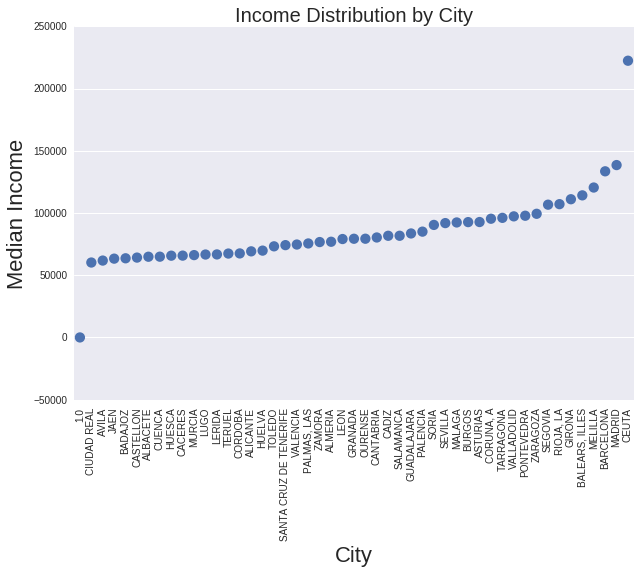

In [97]:
h = sns.factorplot(data=incomes,
                   x="nomprov",
                   y=("renta","MedianIncome"),
                   order=(i for i in incomes.nomprov),
                   size=6,
                   aspect=1.5,
                   scale=1.0,
                   linestyles="None") ## to remove the line between dots 
plt.xticks(rotation=90)
plt.xlabel("City",size=22)
plt.ylabel("Median Income",size=22)
plt.title("Income Distribution by City",size=20)

## Comment:

There is a lot of variations in the median income .. 

Check NAs then assign missing incomes by providence .. 

### Steps:
1. Group the data by city, and reduce to get the median. 
2. Join this intermediate data frame  by the original city names to expand the aggregated median incomes.
3. Order so that there is a 1-to-1 mapping between the rows.
4. The missing values are replaced.

In [98]:
ntrain.renta.isnull().any().any(), ntrain.nomprov.isnull().any().any()

(True, False)

In [99]:
np.count_nonzero(ntrain.renta.isnull().values)

3128

There are 3298 NAs in renta variable (gross income) .. this is why it's important to manipulate them !

In [100]:
grouped = ntrain.groupby("nomprov").agg({"renta":lambda x: x.median(skipna=True)}).reset_index()
new_incomes = pd.merge(ntrain,grouped, how="inner",on="nomprov").loc[:, ["nomprov","renta_y"]]
new_incomes = new_incomes.rename(columns={"renta_y":"renta"}).sort_values("renta").sort_values("nomprov")
ntrain.sort_values("nomprov",inplace=True)
ntrain = ntrain.reset_index()
new_incomes = new_incomes.reset_index()

In [101]:
new_incomes.values

array([[14144, 1.0, 1.0],
       [14191, 1.0, 1.0],
       [14141, 1.0, 1.0],
       ..., 
       [16146, 'ZARAGOZA', 99344.97],
       [16127, 'ZARAGOZA', 99344.97],
       [16426, 'ZARAGOZA', 99344.97]], dtype=object)

In [102]:
ntrain.loc[ntrain.renta.isnull(),"renta"] = new_incomes.loc[ntrain.renta.isnull(),"renta"].reset_index()
ntrain.loc[ntrain.renta.isnull(),"renta"] = ntrain.loc[ntrain.renta.notnull(),"renta"].median()
ntrain.sort_values(by="fecha_dato", inplace=True)

In [103]:
ntrain.renta.isnull().any().any()

False

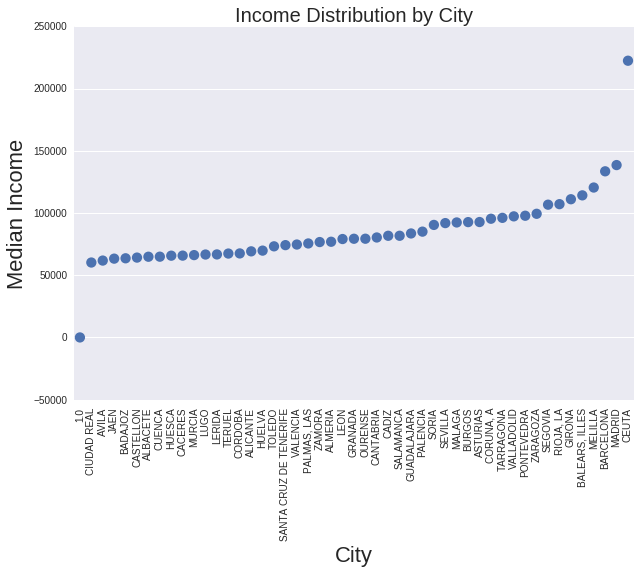

In [104]:
h = sns.factorplot(data=incomes,
                   x="nomprov",
                   y=("renta","MedianIncome"),
                   order=(i for i in incomes.nomprov),
                   size=6,
                   aspect=1.5,
                   scale=1.0,
                   linestyles="None") ## to remove the line between dots 
plt.xticks(rotation=90)
plt.xlabel("City",size=22)
plt.ylabel("Median Income",size=22)
plt.title("Income Distribution by City",size=20)

Yes, the data points become closer to each other !

## Dependent Variables ==> Products:

Let's work on the indicators (Dependent variables) ..

    ind_ahor_fin_ult1 	Saving Account

    ind_aval_fin_ult1 	Guarantees

    ind_cco_fin_ult1 	Current Accounts

    ind_cder_fin_ult1 	Derivada Account

    ind_cno_fin_ult1 	Payroll Account

    ind_ctju_fin_ult1 	Junior Account

    ind_ctma_fin_ult1 	Más particular Account

    ind_ctop_fin_ult1 	particular Account

    ind_ctpp_fin_ult1 	particular Plus Account

    ind_deco_fin_ult1 	Short-term deposits

    ind_deme_fin_ult1 	Medium-term deposits

    ind_dela_fin_ult1 	Long-term deposits

    ind_ecue_fin_ult1 	e-account

    ind_fond_fin_ult1 	Funds

    ind_hip_fin_ult1 	Mortgage

    ind_plan_fin_ult1 	Pensions

    ind_pres_fin_ult1 	Loans

    ind_reca_fin_ult1 	Taxes

    ind_tjcr_fin_ult1 	Credit Card

    ind_valo_fin_ult1 	Securities

    ind_viv_fin_ult1 	Home Account

    ind_nomina_ult1 	Payroll

    ind_nom_pens_ult1 	Pensions

    ind_recibo_ult1 	Direct Debit

In [105]:
ntrain.ix[:,25:48]

,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
93,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
92,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
91,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
90,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
89,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
88,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
87,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
86,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
85,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [106]:
ntrain.ix[:,25:48].describe()

,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
count,19040.000000,19040.000000,19040.000000,19040.000000,19040.000000,19040.000000,19040.000000,19040.000000,19040.000000,19040.000000,19040.000000,19040.000000,19040.000000,19040.000000,19040.000000,19040.000000,19040.000000,19040.000000,19040.000000,19040.000000
mean,0.092279,0.018487,0.020273,0.137290,0.061345,0.009664,0.008981,0.058718,0.098424,0.025368,0.012447,0.014443,0.009244,0.057405,0.054937,0.030567,0.010924,0.064706,0.067595,0.146113
std,0.289428,0.134709,0.140937,0.344162,0.239968,0.097831,0.094345,0.235103,0.297895,0.157243,0.110875,0.119312,0.095701,0.232622,0.227863,0.172147,0.103950,0.246013,0.251055,0.353229
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


It makes no sense to calc the above describtion for boolean variables .. 

Let's check the NAs and unqiue values ..

In [107]:
ntrain.ix[:,25:48].isnull().any()

ind_cno_fin_ult1     False
ind_ctju_fin_ult1    False
ind_ctma_fin_ult1    False
ind_ctop_fin_ult1    False
ind_ctpp_fin_ult1    False
ind_deco_fin_ult1    False
ind_deme_fin_ult1    False
ind_dela_fin_ult1    False
ind_ecue_fin_ult1    False
ind_fond_fin_ult1    False
ind_hip_fin_ult1     False
ind_plan_fin_ult1    False
ind_pres_fin_ult1    False
ind_reca_fin_ult1    False
ind_tjcr_fin_ult1    False
ind_valo_fin_ult1    False
ind_viv_fin_ult1     False
ind_nomina_ult1      False
ind_nom_pens_ult1    False
ind_recibo_ult1      False
dtype: bool

Only two variables contains NAs ! (ind_nomina_ult1, ind_nom_pens_ult1) 

In [108]:
ntrain.ind_nomina_ult1.median(), ntrain.ind_nom_pens_ult1.median()

(0.0, 0.0)

The median in both is 0, this is why we gonna replace NAs with zero !

In [109]:
ntrain.loc[ntrain.ind_nomina_ult1.isnull(), "ind_nomina_ult1"] = 0
ntrain.loc[ntrain.ind_nom_pens_ult1.isnull(), "ind_nom_pens_ult1"] = 0

In [110]:
ntrain.ind_nomina_ult1.isnull().any().any(), ntrain.ind_nom_pens_ult1.isnull().any().any()

(False, False)

In [111]:
ntrain.sexo.mode(), ntrain.segmento.mode()

(0    V
 dtype: object, 0    02 - PARTICULARES
 dtype: object)

Let's replace the values of sex and segmention by the mode .. as these are categorical variables ..

In [112]:
ntrain.loc[ntrain.segmento.isnull(), "segmento"] =  ntrain.segmento.mode()

In [113]:
ntrain.segmento.isnull().any().any()

True

NAs are still there !! :S

In [114]:
ntrain.segmento.value_counts()

02 - PARTICULARES     10105
03 - UNIVERSITARIO     7993
01 - TOP                813
1.0                     128
Name: segmento, dtype: int64

## Other variables:
indfall  ==>  Deceased index. N/S

tiprel_1mes  ==>   Customer relation type at the beginning of the month, A (active), I (inactive), P (former customer),R (Potential)  

In [115]:
ntrain.indfall.unique()

array([1.0, 'N', 'S'], dtype=object)

In [116]:
ntrain.indfall.mode()

0    N
dtype: object

In [117]:
ntrain.loc[ntrain.indfall.isnull(),"indfall"] = "N"

In [118]:
ntrain.indfall.unique()

array([1.0, 'N', 'S'], dtype=object)

cuase 1 is not treated as NA .. but it still incorrect value !

In [119]:
ntrain.tiprel_1mes.unique(), ntrain.tiprel_1mes.mode()
ntrain.loc[ntrain.tiprel_1mes.isnull(),"tiprel_1mes"] = "I"

In [120]:
ntrain.tiprel_1mes.isnull().any().any()

False

6yeb del2wty el problem enn feh values of 1 .. dool typo but not treated as NAs .. I think I have to convert them to NAs .. then proceed ..

mmm should I really convert it to NA, delete it or just ignore it !! .. 

In case they will be converted to NA .. this is the code ..

ntrain.indfall.replace({1.0: np.NAN}, inplace=True)

ntrain.tiprel_1mes.replace({1.0: np.NAN}, inplace=True)

ntrain.segmento.replace({1.0: np.NAN}, inplace=True)

ntrain.segmento.unique()


## Let's do some visualizations:


The problem is there is a value of 1 exists on top of each column .. besides the spaces inside the fields .. 

One of the solutions is to strip the columns .. the problem yet is in scanning all the columns .. 

In [121]:
type(ntrain.age)
ntrain['age'] = ntrain['age'].convert_objects(convert_numeric=True)
type(ntrain.age)

pandas.core.series.Series

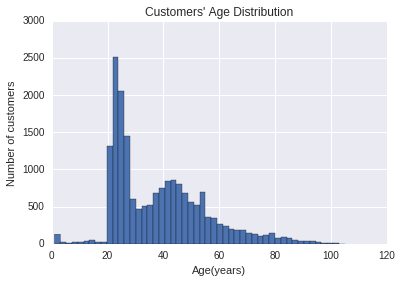

In [122]:
ntrain["age"].hist(bins=50)
plt.title("Customers' Age Distribution")
plt.xlabel("Age(years)")
plt.ylabel("Number of customers") 

It is observed to have ages below 18 or above 100 .. which is a little bit unexected ! .. 

as age distribution is bimodal .. we gonna fill in these unexpected values with the mean of the surrounded values .. i.e. below 30 or above 100 

In [123]:
# age is seen as str .. it has to be converted to numeric value

ntrain['age'] = ntrain['age'].convert_objects(convert_numeric=True)

ntrain.loc[ntrain.age < 18,"age"]  = ntrain.loc[(ntrain.age >= 18) & (ntrain.age <= 30),"age"].mean(skipna=True)
ntrain.loc[ntrain.age > 100,"age"] = ntrain.loc[(ntrain.age >= 30) & (ntrain.age <= 100),"age"].mean(skipna=True)
ntrain["age"].fillna(ntrain["age"].mean(),inplace=True)
ntrain["age"] = ntrain["age"].astype(int)

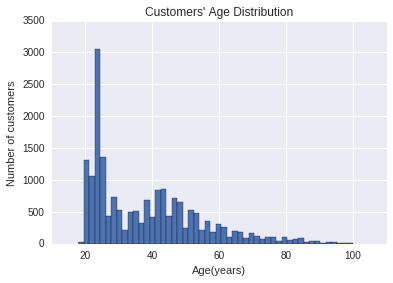

In [124]:
ntrain.age.hist(bins=50)
plt.title("Customers' Age Distribution")
plt.xlabel("Age(years)")
plt.ylabel("Number of customers") 

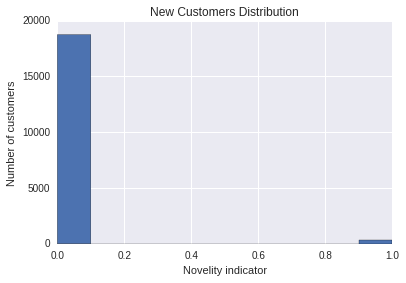

In [125]:
ntrain.ind_nuevo.hist()  ## defualt bins 
plt.title("New Customers Distribution")
plt.xlabel("Novelity indicator")
plt.ylabel("Number of customers") 

This is mainly a binary variable .. One means novel customers while zeros represent old ones.

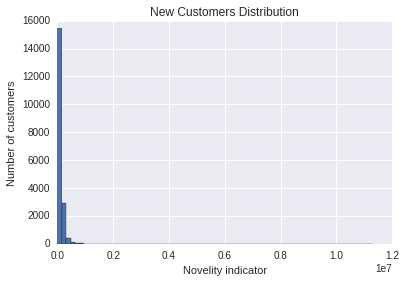

In [126]:
ntrain["renta"].hist(bins = 70)
plt.title("New Customers Distribution")
plt.xlabel("Novelity indicator")
plt.ylabel("Number of customers") 

## ind_empleado:
Employee index: A active, B ex employed, F filial, N not employee, P pasive

In [127]:
ntrain.ind_empleado.value_counts()

N      18901
1.0      128
B          5
A          3
F          3
Name: ind_empleado, dtype: int64

In [128]:
ntrain.loc[ntrain["ind_empleado"].isnull(),"ind_empleado"] = 0

In [129]:
ntrain.ind_empleado.isnull().any().any()

False

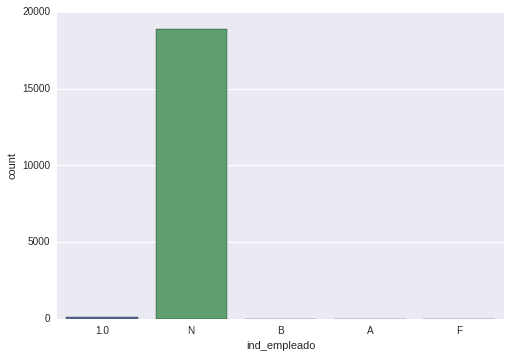

In [130]:
sns.set(style="darkgrid")
ax = sns.countplot(ntrain.ind_empleado)

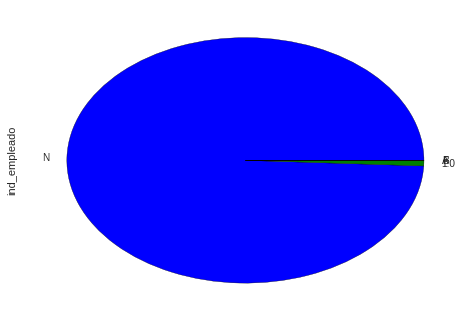

In [131]:
ntrain.ind_empleado.value_counts().plot(x=None, y=None, kind = 'pie')

Those who are not employees have the highest portion followed by NAs ! :S

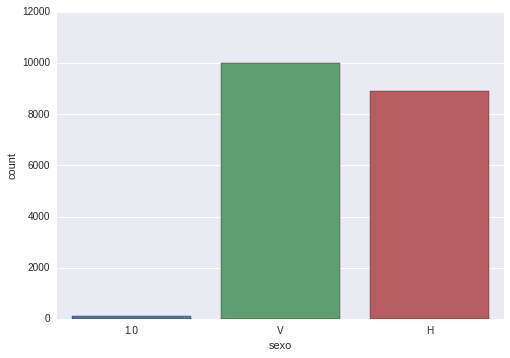

In [132]:
ax = sns.countplot(ntrain.sexo)

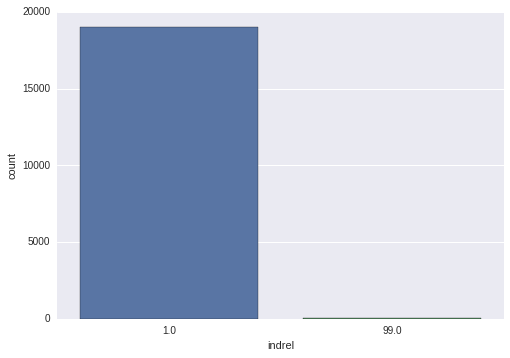

In [133]:
sns.countplot(ntrain.indrel)

1 (First/Primary), 99 (Primary customer during the month but not at the end of the month) .. 

The previous chart shows that about 99% belong to one class and about 1% of the data belong to the rest ..  

Let's try pie chart .. to assure this conclusion .. 



([<matplotlib.patches.Wedge at 0x7f78484869d0>,
  <matplotlib.text.Text at 0x7f7848422210>])

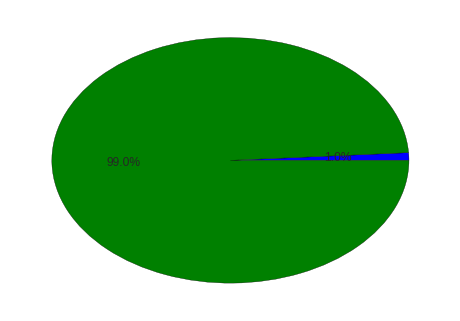

In [134]:
plt.pie(ntrain.indrel.unique(), autopct='%1.1f%%')

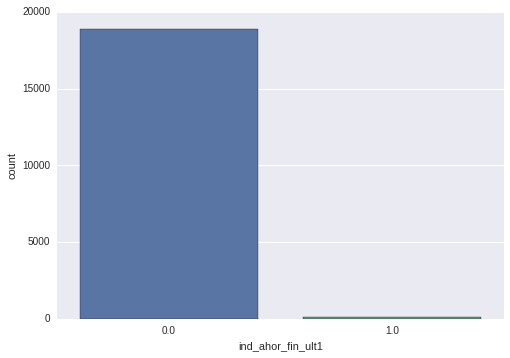

In [135]:
sns.countplot(ntrain.ind_ahor_fin_ult1) ##Saving Account

In [136]:
ntrain["ind_ahor_fin_ult1"].value_counts()

0    18912
1      128
Name: ind_ahor_fin_ult1, dtype: int64

This illustrates the big difference between the two values ! 

## canal_entrada:
channel used by the customer to join

In [137]:
ntrain['canal_entrada'].unique()

array([1.0, 'KHE', 'KAT', 'RED', 'KHD', 'KFC', 'KHK', 'KHL', 'KFG', 'KDH',
       'KHC', 'KAH', 'KFA', 'KAZ', 'KAR', 'KHF', 'KFP', 'KEH', 'KCC',
       'KFD', 'KGX', 'KAQ', 'KAG', 'KFJ', 'KFN', 'KFU', 'KFS', 'KFK',
       'KCH', 'KCI', 'KAW', 'KFB', 'KAM', 'KBZ', 'KES', 'KAL', 'KFT',
       'K00', 'KAJ', 'KAY', 'KCB', 'KAS', '013', '007', 'KBH', 'KBB',
       'KCM', 'KAB', 'KCN', 'KCL', 'KCA', 'KBO', 'KAK', 'KCD', 'KCR',
       'KCK', 'KBV', 'KAA', 'KEY', 'KBF', 'KAP', 'KEI', 'KAE', 'KAO',
       'KBR', 'KAF', 'KEG', 'KEJ', 'KEK', 'KDR', 'KGY', 'KEV', 'KAC',
       'KDX', 'KEN', 'KHN', 'KDU', 'KAD', 'KDQ', 'KEW', 'KDV', 'KDP',
       'KDO', 'KEB', 'KDE', 'KDS', 'KAN', 'KFF', 'KAI', 'KED', 'KFR',
       'KFL', 'KCG', 'KGV', 'KEZ', 'KFH', 'KCU', 'KHO', 'KBQ', 'KBY',
       'KBW', 'KBG', 'KBM', 'KBS', 'KDC'], dtype=object)

In [138]:
ntrain['canal_entrada'].value_counts().head(15)

KHE    7592
KFC    4200
KAT    4100
KFA     650
KHK     305
KHD     229
1.0     128
RED     112
KAG      92
KAS      84
KFD      77
KAA      77
KAB      73
KAY      71
KHL      70
Name: canal_entrada, dtype: int64

If we want to display only the top 15 channels .. 


In [139]:
ntrain['canal_entrada'].value_counts().head(15)

KHE    7592
KFC    4200
KAT    4100
KFA     650
KHK     305
KHD     229
1.0     128
RED     112
KAG      92
KAS      84
KFD      77
KAA      77
KAB      73
KAY      71
KHL      70
Name: canal_entrada, dtype: int64

In [140]:
len(ntrain['canal_entrada'].unique()) # number of unique values 

105

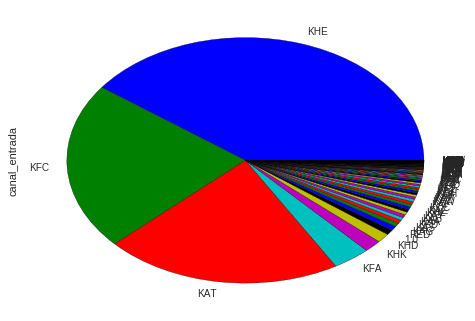

In [141]:
ntrain["canal_entrada"].value_counts().plot(x=None, y=None, kind='pie') 

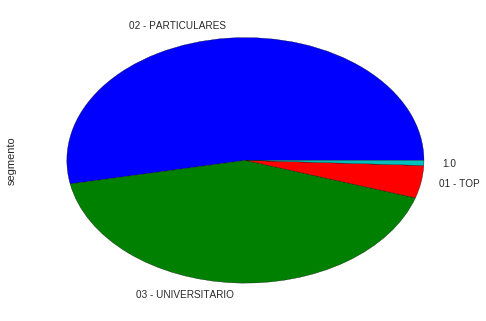

In [142]:
ntrain.segmento.value_counts().plot(x=None, y=None, kind='pie')  # Gross income of the household

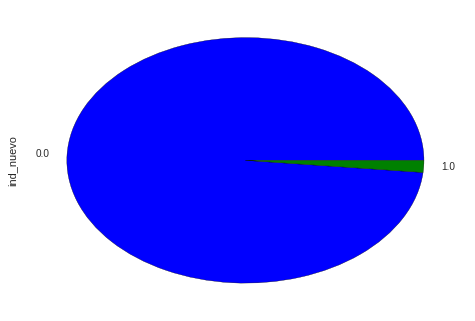

In [143]:
ntrain.ind_nuevo.value_counts().plot(x=None, y=None, kind='pie')

In [144]:
ntrain['pais_residencia'].value_counts()  ## Customer's Country residence

ES     18822
1.0      128
AR        10
GB         9
FR         9
DE         7
US         6
IT         5
VE         5
EC         5
FI         3
CO         3
CH         3
BR         2
MX         2
SE         2
RO         2
PT         2
BO         2
TW         2
CA         2
CR         2
IL         2
PE         2
JP         1
PY         1
CL         1
Name: pais_residencia, dtype: int64

In [145]:
ntrain['pais_residencia'].describe()

count     19040
unique       27
top          ES
freq      18822
Name: pais_residencia, dtype: object

The most frequent value is ES ..

## The relationship between sex and activity index:

Sexo either Males (H) or Females (V) .. 

Activity index .. either (1) active customers or (0) represents inactive customers ..

In [146]:
ntrain_a = ntrain.loc[:, ['sexo', 'ind_actividad_cliente']].join(ntrain.loc[:, "ind_ahor_fin_ult1": "ind_recibo_ult1"])
ntrain_a

,sexo,ind_actividad_cliente,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
93,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
92,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
91,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
90,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
89,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
88,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
87,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
86,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
85,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [147]:
ntrain_a = ntrain_a.groupby(['sexo', 'ind_actividad_cliente']).sum()
ntrain_a

ind_ahor_fin_ult1  ind_aval_fin_ult1  \
sexo ind_actividad_cliente                                         
1.0  1                                    128                128   
H    0                                      0                  0   
     1                                      0                  0   
V    0                                      0                  0   
     1                                      0                  1   

                            ind_cco_fin_ult1  ind_cder_fin_ult1  \
sexo ind_actividad_cliente                                        
1.0  1                                   128                128   
H    0                                  4100                  0   
     1                                  3291                  2   
V    0                                  3667                  3   
     1                                  4222                 10   

                            ind_cno_fin_ult1  ind_ctju_fin_ult1  \
sexo ind_actividad_cliente                                        
1.0  1                                   128                128   
H    0                                    21                 14   
     1                                   672                100   
V    0                                     4                 30   
     1                                   932                 80   

                            ind_ctma_fin_ult1  ind_ctop_fin_ult1  \
sexo ind_actividad_cliente                                         
1.0  1                                    128                128   
H    0                                     31                282   
     1                                     89                638   
V    0                                     28                514   
     1                                    110               1052   

                            ind_ctpp_fin_ult1  ind_deco_fin_ult1  \
sexo ind_actividad_cliente                                         
1.0  1                                    128                128   
H    0                                    100                  0   
     1                                    340                 19   
V    0                                    131                 11   
     1                                    469                 26   

                                 ...         ind_hip_fin_ult1  \
sexo ind_actividad_cliente       ...                            
1.0  1                           ...                      128   
H    0                           ...                        0   
     1                           ...                       40   
V    0                           ...                        1   
     1                           ...                       68   

                            ind_plan_fin_ult1  ind_pres_fin_ult1  \
sexo ind_actividad_cliente                                         
1.0  1                                    128                128   
H    0                                      0                  0   
     1                                     52                 12   
V    0                                      0                  5   
     1                                     95                 31   

                            ind_reca_fin_ult1  ind_tjcr_fin_ult1  \
sexo ind_actividad_cliente                                         
1.0  1                                    128                128   
H    0                                     16                  3   
     1                                    294                323   
V    0                                     45                 14   
     1                                    610                578   

                            ind_valo_fin_ult1  ind_viv_fin_ult1  \
sexo ind_actividad_cliente                                        
1.0  1                                    128               128   
H    0                                      0 

In [148]:
ntrain_a = ntrain_a.T
ntrain_a.head()

sexo                   1.0     H           V      
ind_actividad_cliente    1     0     1     0     1
ind_ahor_fin_ult1      128     0     0     0     0
ind_aval_fin_ult1      128     0     0     0     1
ind_cco_fin_ult1       128  4100  3291  3667  4222
ind_cder_fin_ult1      128     0     2     3    10
ind_cno_fin_ult1       128    21   672     4   932

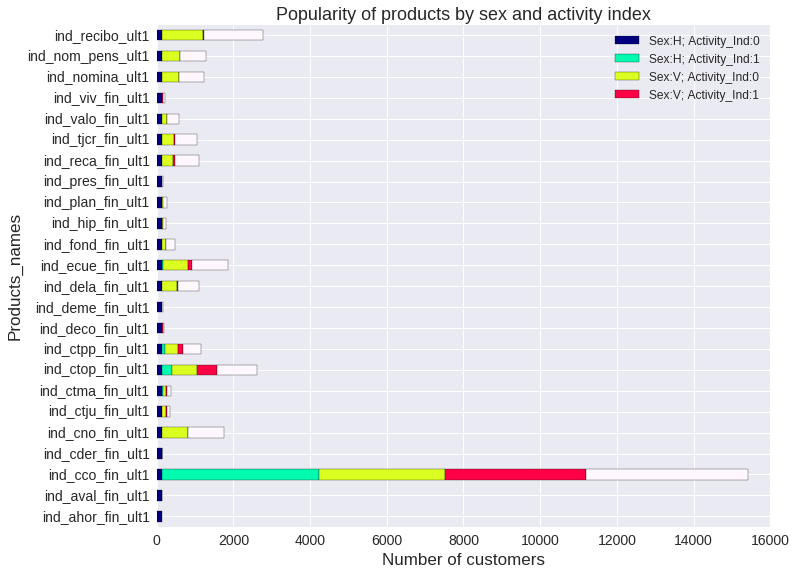

In [149]:
ntrain_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[11,9], colormap='gist_ncar')
plt.title('Popularity of products by sex and activity index', fontsize=18) 
plt.xlabel('Number of customers', fontsize=17) 
plt.ylabel('Products_names', fontsize=17) 
plt.legend(["Sex:H; Activity_Ind:0", "Sex:H; Activity_Ind:1", "Sex:V; Activity_Ind:0", 
            "Sex:V; Activity_Ind:1"], prop={'size':12}) 

The highest value is Current Accounts .. which means that most of customers use their current accounts ..

Least values are CASA (Saving Accounts and Guarantees) .. 

Let's drop the current accounts and plot the stacked chart again .. 

In [150]:
# excluding the dominant product 
exclude = ['ind_cco_fin_ult1']
ntrain_a = ntrain_a.T
ntrain_a = ntrain_a.drop(exclude, axis=1).T

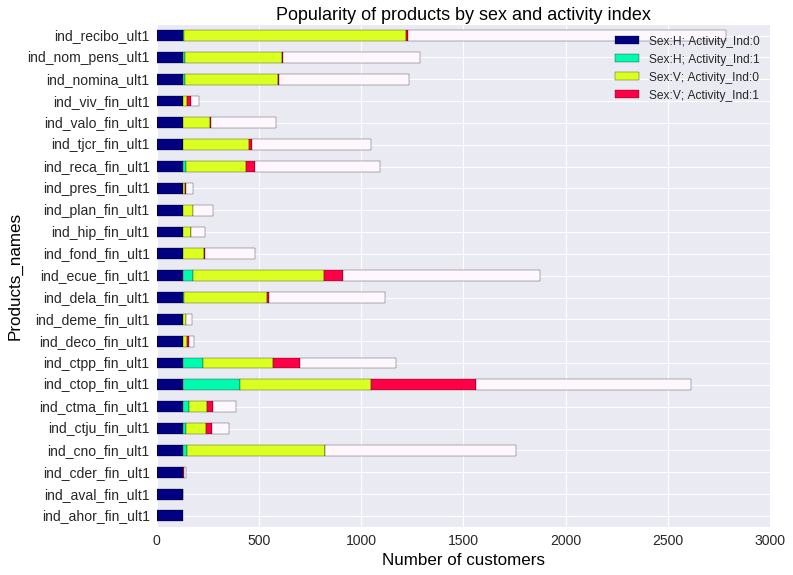

In [151]:
## plotting the rest of variables ..

ntrain_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[11,9], colormap='gist_ncar')
plt.title('Popularity of products by sex and activity index', fontsize=18, color='black') 
plt.xlabel('Number of customers', fontsize=17, color='black') 
plt.ylabel('Products_names', fontsize=17, color='black') 
plt.legend(["Sex:H; Activity_Ind:0", "Sex:H; Activity_Ind:1", "Sex:V; Activity_Ind:0", 
            "Sex:V; Activity_Ind:1"], prop={'size':12}) 

The gap between the products usage is decreased .. 

The chart demonestrates that most of the products are owned by inactive males .. 

## Transformation:

Let's add a new column represent total number of used products per customer per month .. 

In [6]:
ntrain["tot_products"] = ntrain.loc[:,"ind_ahor_fin_ult1":"ind_recibo_ult1"].sum(axis=1)

In [7]:
ntrain

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,tot_products
0,2015-02-28,1183288,N,ES,H,61,2013-09-25,0,22,1,...,0,0,0,0,0,0,0,0,0,1
1,2015-02-28,1183287,N,ES,H,47,2013-09-27,0,22,1,...,0,0,0,0,0,0,0,0,1,2
2,2015-02-28,1183250,N,ES,V,26,2013-09-25,0,22,1,...,0,0,0,0,0,0,0,0,0,1
3,2015-02-28,1183248,N,ES,H,22,2013-09-25,0,22,1,...,0,0,0,0,0,0,0,0,0,1
4,2015-02-28,1183243,N,ES,V,22,2013-09-25,0,22,1,...,0,0,0,0,0,0,0,0,0,1
5,2015-02-28,1183241,N,ES,H,21,2013-09-25,0,22,1,...,0,0,0,0,0,0,0,0,0,1
6,2015-02-28,1183196,N,ES,H,30,2013-09-25,0,22,1,...,0,0,0,0,0,0,0,0,0,1
7,2015-02-28,1183195,N,ES,V,21,2013-09-25,0,22,1,...,0,0,0,0,0,0,0,0,0,1
8,2015-02-28,1183194,N,ES,H,22,2013-09-25,0,22,1,...,0,0,0,0,0,0,0,0,1,2
9,2015-02-28,1183191,N,ES,H,21,2013-09-25,0,22,1,...,0,0,0,0,0,0,0,0,0,1


In [8]:
ntrain["tot_products"]   = pd.to_numeric(ntrain["tot_products"], errors="coerce") 

In [9]:
ntrain

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,tot_products
0,2015-02-28,1183288,N,ES,H,61,2013-09-25,0,22,1,...,0,0,0,0,0,0,0,0,0,1
1,2015-02-28,1183287,N,ES,H,47,2013-09-27,0,22,1,...,0,0,0,0,0,0,0,0,1,2
2,2015-02-28,1183250,N,ES,V,26,2013-09-25,0,22,1,...,0,0,0,0,0,0,0,0,0,1
3,2015-02-28,1183248,N,ES,H,22,2013-09-25,0,22,1,...,0,0,0,0,0,0,0,0,0,1
4,2015-02-28,1183243,N,ES,V,22,2013-09-25,0,22,1,...,0,0,0,0,0,0,0,0,0,1
5,2015-02-28,1183241,N,ES,H,21,2013-09-25,0,22,1,...,0,0,0,0,0,0,0,0,0,1
6,2015-02-28,1183196,N,ES,H,30,2013-09-25,0,22,1,...,0,0,0,0,0,0,0,0,0,1
7,2015-02-28,1183195,N,ES,V,21,2013-09-25,0,22,1,...,0,0,0,0,0,0,0,0,0,1
8,2015-02-28,1183194,N,ES,H,22,2013-09-25,0,22,1,...,0,0,0,0,0,0,0,0,1,2
9,2015-02-28,1183191,N,ES,H,21,2013-09-25,0,22,1,...,0,0,0,0,0,0,0,0,0,1


Total number of products per customer:

In [10]:
ntrain["tot_products"].value_counts()

1     654818
2     163533
3      62907
4      35390
0      23817
5      23076
6      16555
7      10740
8       5593
9       2354
10       840
11       284
12        73
13        16
14         3
15         1
Name: tot_products, dtype: int64

The majority of the customers use only one type of products 

## Total number of products per age:

In [157]:
ntrain_a_ = ntrain.groupby(['age'])['tot_products'].agg('sum')
ntrain_a_

age
18       17
19       11
20      323
21     1026
22     1107
23     1549
24     4709
25      814
26      693
27      527
28      516
29      424
30      470
31      442
32      379
33      479
34      339
35      473
36      492
37      695
38      805
39      755
40      915
41      887
42     1121
43      874
44     1080
45     1021
46      850
47      837
       ... 
71      126
72      109
73      120
74       96
75       87
76       88
77      104
78       74
79       79
80      104
81       90
82       50
83       59
84       68
85       73
86       55
87       39
88       35
89       39
90       53
91       25
92       26
93       21
94       29
95       19
96       15
97        6
98       11
99       12
100       8
Name: tot_products, dtype: float64

Let's sort them to check which age contributes the most in the majority of the products .. 

In [158]:
ntrain_a_.sort_values(ascending=False).head(20)

age
24    4709
23    1549
42    1121
22    1107
44    1080
21    1026
45    1021
40     915
41     887
43     874
46     850
47     837
25     814
38     805
48     780
39     755
37     695
26     693
49     661
51     623
Name: tot_products, dtype: float64

Those who have 23 yeas old have the highest number of products .. 

Let's demonestate this graphically ..

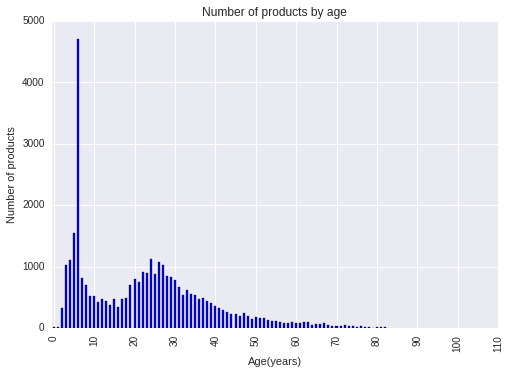

In [159]:
# Number of products by age 
ntrain_a_.plot(kind = 'bar') 
plt.xticks(np.arange(0, 120, 10), [str(x) for x in np.arange(0, 120, 10)]) # range from 0 to 120 with inc. 10
plt.title('Number of products by age') 
plt.xlabel('Age(years)') 
plt.ylabel('Number of products') 

Yup, the highest value is 23 ! .. 

However, somehow this is a bimodal distrubution with another peak at middle aged customers from 35 to 50 years old .. followed by young customers in thier twentieths.

Let's have a closer look at the distribution by creating age group ..

In [160]:
## converting age to numeric
type(ntrain.age)
ntrain['age'] = ntrain['age'].convert_objects(convert_numeric=True)


# Let's create age groups
ntrain_a = (ntrain.groupby(pd.cut(ntrain['age'], [0,20,40,60,80,100, pd.np.inf], right=False)).sum())
ntrain_a

,index,ncodpers,age,ind_nuevo,indrel,indrel_1mes,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,...,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,tot_products
age,,,,,,,,,,,,,,,,,,,,,
"[0, 20)",15008517,17479978,515,1,28,28,23,4.275596e+06,0,0,...,0,0,0,0,0,0,0,0,0,28
"[20, 40)",5114174266,11221084471,287132,223,12136,10764,4566,1.230763e+09,128,128,...,143,142,369,319,192,142,504,512,1148,17017
"[40, 60)",3232543249,3680478071,290783,56,6972,6090,4175,8.155706e+08,0,1,...,106,27,612,623,285,59,676,686,1404,13780
"[60, 80)",889828103,907391909,111563,20,1750,1652,992,2.368185e+08,0,0,...,24,5,96,94,82,5,52,84,197,3171
"[80, 100)",268978781,250603415,42986,0,499,499,260,7.363807e+07,0,0,...,2,2,16,10,23,2,0,5,33,829
"[100, inf)",4002134,2753435,700,0,7,7,3,1.299478e+06,0,0,...,0,0,0,0,0,0,0,0,0,8


In [161]:
## lets display the same table above excluding the two unnecessary columns .. 

ntrain_a = ntrain_a.loc[:, "ind_ahor_fin_ult1": "ind_recibo_ult1"]
ntrain_a = ntrain_a.T
ntrain_a.head()

age,"[0, 20)","[20, 40)","[40, 60)","[60, 80)","[80, 100)","[100, inf)"
ind_ahor_fin_ult1,0,128,0,0,0,0
ind_aval_fin_ult1,0,128,1,0,0,0
ind_cco_fin_ult1,0,9594,4311,1162,335,6
ind_cder_fin_ult1,0,129,8,6,0,0
ind_cno_fin_ult1,0,744,863,135,15,0


How come the values are numeric .. not binary ! :S

As they represent total number of products per age group .. 

Let's plot them to assure .. 

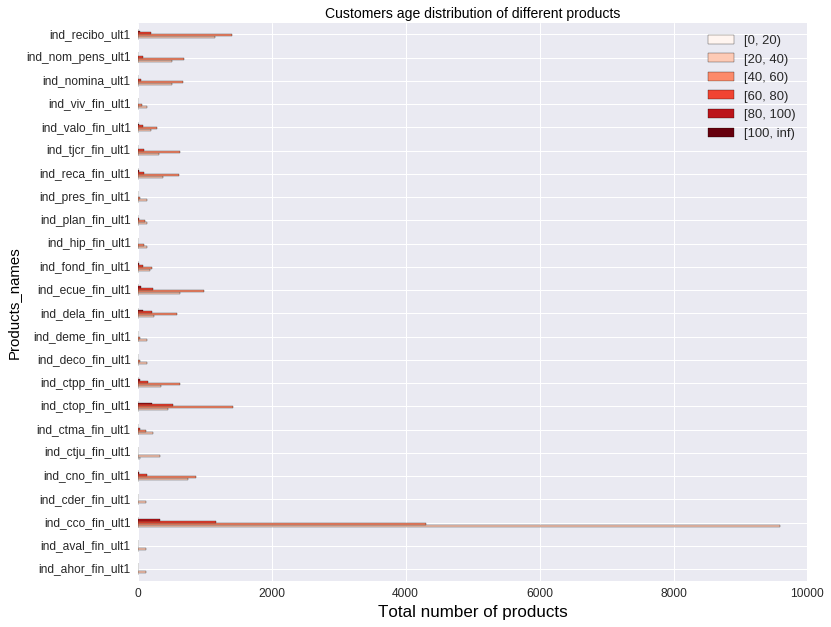

In [162]:
# Plot of customers' age distibution of each product 
ntrain_a.plot(kind='barh', fontsize=12, figsize=[12,10], colormap='Reds')
plt.title('Customers age distribution of different products', fontsize=14, color='black') 
plt.xlabel('Total number of products', fontsize=17, color='black') 
plt.ylabel('Products_names', fontsize=15, color='black') 
plt.legend(prop={'size':13}, loc=1) 

The above figure shows that the majority of age group from 20 to 40 years old use current accounts .. 

Let's remove this dominant varaiable and retest the usage .. 

In [163]:
exclude = ['ind_cco_fin_ult1']
ntrain_a = ntrain_a.T
ntrain_a = ntrain_a.drop(exclude, axis=1).T

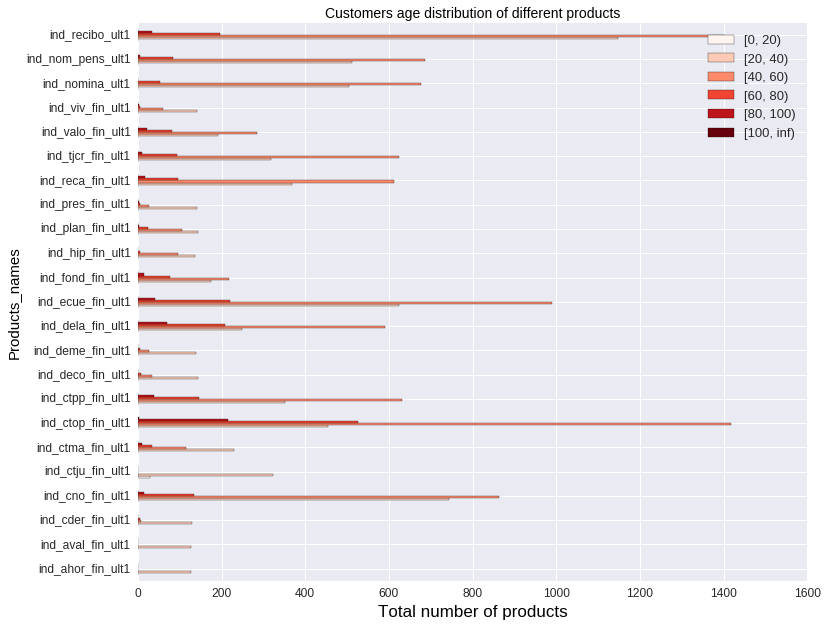

In [164]:
ntrain_a.plot(kind='barh', fontsize=12, figsize=[12,10], colormap='Reds')
plt.title('Customers age distribution of different products', fontsize=14, color='black') 
plt.xlabel('Total number of products', fontsize=17, color='black') 
plt.ylabel('Products_names', fontsize=15, color='black') 
plt.legend(prop={'size':13}, loc=1) 

The age group differs and the most frequent product as well .. now, Direct Debit is the dominant product ..

## Total number of products by segmentation:

In [165]:
ntrain_a = ntrain.groupby(['segmento'])['tot_products'].agg('sum') 
ntrain_a

segmento
1.0                    3072
01 - TOP               3111
02 - PARTICULARES     19641
03 - UNIVERSITARIO     9009
Name: tot_products, dtype: float64

PARTICULARES (Individuals) are the most important group

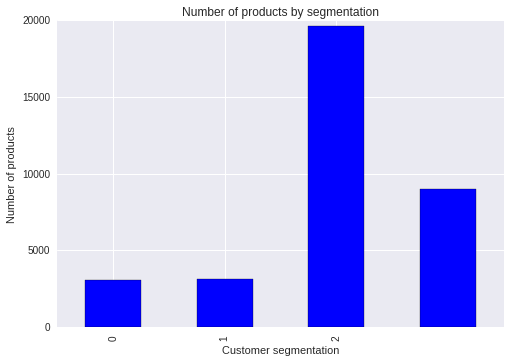

In [166]:
# Number of products by segmentation
ntrain_a.plot(kind = 'bar') 
plt.xticks(np.arange(0, 3), [str(x) for x in np.arange(0, 3)]) # range from 0 to 120 with inc. 10
plt.title('Number of products by segmentation') 
plt.xlabel('Customer segmentation') 
plt.ylabel('Number of products') 

## Number of products per customer index:

In [167]:
ntrain_a = ntrain.groupby(['ind_nuevo'])['tot_products'].agg('count') 
ntrain_a

ind_nuevo
0    18740
1      300
Name: tot_products, dtype: int64

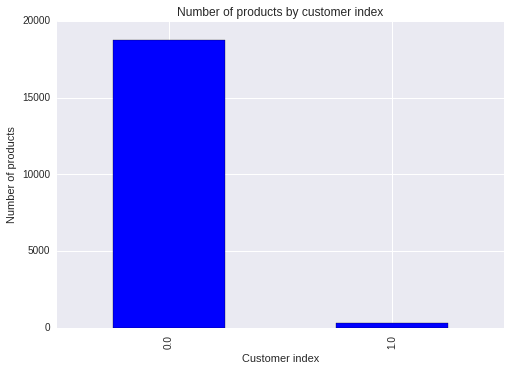

In [168]:
# Number of products by customer index
ntrain_a.plot(kind = 'bar') 
plt.xticks(np.arange(0, 2)) 
plt.title('Number of products by customer index') 
plt.xlabel('Customer index') 
plt.ylabel('Number of products') 

The majority are old customers ..

## Number of products by customer regularity:
i.e. first (1) or primary (99) customer

In [169]:
ntrain_a = ntrain.groupby(['indrel'])['tot_products'].agg('count') 
ntrain_a

indrel
1     19016
99       24
Name: tot_products, dtype: int64

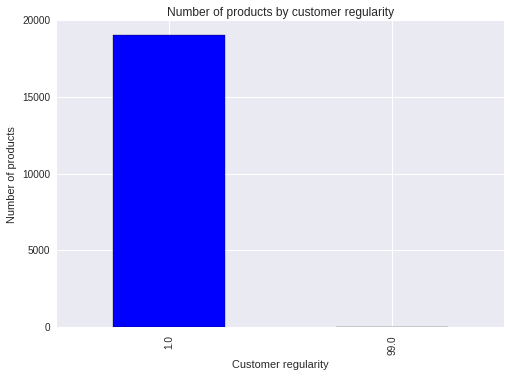

In [170]:
# Number of products by customer regularity
ntrain_a.plot(kind = 'bar') 
plt.xticks(np.arange(0, 2)) 
plt.title('Number of products by customer regularity') 
plt.xlabel('Customer regularity') 
plt.ylabel('Number of products') 



Almost all customers are regular customers throughout the month


## Number of products per customer type at the beginning of the month:

Customer type at the beginning of the month ==>

1 (First/Primary customer), 

2 (co-owner ),P (Potential),

3 (former primary), 

4(former co-owner)

In [171]:
ntrain_a = ntrain.groupby(['indrel_1mes'])['tot_products'].agg('count') 
ntrain_a

indrel_1mes
1    19040
Name: tot_products, dtype: int64

It is weired I have only three unique values in my sample .. ! ..

The highest number of products owned by the 1st type (primary customers) ..

## Number of products by customer relation type:
tiprel_1mes ==> Customer relation type at the beginning of the month,

A (active), 

I (inactive), 

P (former customer),

R (Potential)

In [172]:
ntrain_a = ntrain.groupby(['tiprel_1mes'])['tot_products'].agg('count') 
ntrain_a

tiprel_1mes
1.0     128
A      9595
I      9317
Name: tot_products, dtype: int64

There are no potential customers in the selected sample ..

While, the highest number of products owned by Active customers

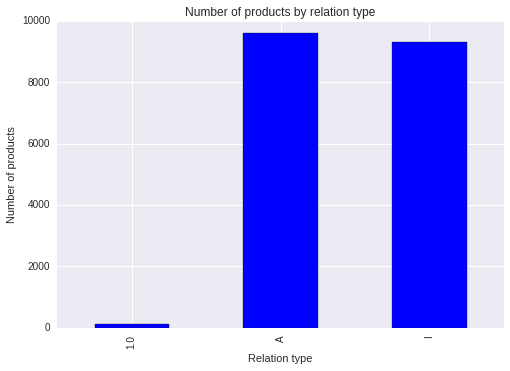

In [173]:
ntrain_a.plot(kind = 'bar') 
plt.xticks(np.arange(0, 3)) 
plt.title('Number of products by relation type') 
plt.xlabel('Relation type') 
plt.ylabel('Number of products') 

## Number of products by country index:
 Foreigner index (S (Yes) or N (No) if the customer's birth country is different than the bank country)

In [174]:
ntrain_a = ntrain.groupby(['indext'])['tot_products'].agg('count') 
ntrain_a

indext
1.0      128
N      18021
S        891
Name: tot_products, dtype: int64

The majority have customer's birth country different from Spain (bank country) 

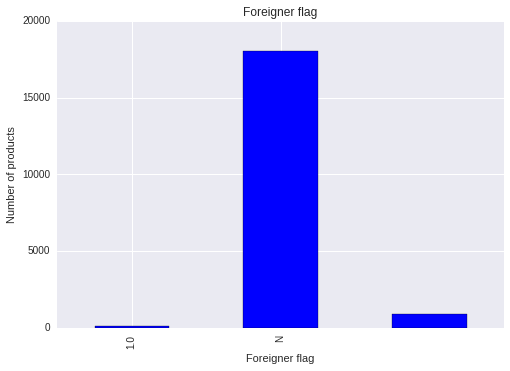

In [175]:
ntrain_a.plot(kind = 'bar') 
plt.xticks(np.arange(0, 2)) 
plt.title('Foreigner flag') 
plt.xlabel('Foreigner flag') 
plt.ylabel('Number of products') 

## Total number of products per income:

In [176]:
ntrain_a = (ntrain.groupby(pd.cut(ntrain['renta'], [0,60000,120000,180000,240000, pd.np.inf], right=False)).sum())
ntrain_a

## right = false if we want to exlude the upper value of the interval 

,index,ncodpers,age,ind_nuevo,indrel,indrel_1mes,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,...,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,tot_products
renta,,,,,,,,,,,,,,,,,,,,,
"[0, 60000)",1492405526,2752545923,105213,151,3050,3050,1417,1.321297e+08,128,128,...,142,140,225,218,161,132,259,270,478,7344
"[60000, 120000)",4913562091,8720971786,372840,102,12155,9901,5011,8.882912e+08,0,0,...,63,26,431,409,191,26,486,512,1286,15692
"[120000, 180000)",1654395872,2583282776,132967,18,3365,3267,1858,4.760680e+08,0,1,...,34,4,206,212,87,20,250,261,535,6104
"[180000, 240000)",750685167,1034748952,62976,19,1442,1442,914,2.978731e+08,0,0,...,23,2,110,106,70,18,124,128,253,2943
"[240000, inf)",713486394,988241842,59683,10,1380,1380,819,5.680031e+08,0,0,...,13,4,121,101,73,12,113,116,230,2750


In [177]:
ntrain_a["tot_products"]

renta
[0, 60000)           7344
[60000, 120000)     15692
[120000, 180000)     6104
[180000, 240000)     2943
[240000, inf)        2750
Name: tot_products, dtype: float64

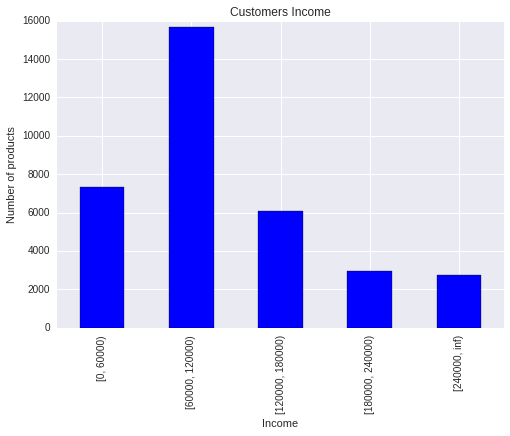

In [178]:
ntrain_a["tot_products"].plot(kind = 'bar') 
plt.xticks(np.arange(0, 5)) 
plt.title('Customers Income') 
plt.xlabel('Income') 
plt.ylabel('Number of products') 

The majority of the customer have income within the interval of 60000 and 120000  

## Number of products per channel:
channel used by the customer to join

In [179]:
ntrain_a = ntrain.groupby(['canal_entrada'])['tot_products'].agg('sum') 
ntrain_a

canal_entrada
1.0    3072
007      65
013      67
K00       2
KAA     140
KAB     118
KAC      20
KAD      31
KAE     154
KAF     115
KAG     225
KAH      75
KAI     118
KAJ      46
KAK       0
KAL      24
KAM      26
KAN      19
KAO       9
KAP      32
KAQ      75
KAR      93
KAS     223
KAT    9361
KAW     141
KAY     124
KAZ     143
KBB       0
KBF       6
KBG       3
       ... 
KEY      73
KEZ       6
KFA    1456
KFB       1
KFC    8531
KFD     174
KFF      15
KFG      32
KFH      14
KFJ      18
KFK      14
KFL       5
KFN      10
KFP      49
KFR       2
KFS      16
KFT      41
KFU       6
KGV      45
KGX      29
KGY      13
KHC      76
KHD     251
KHE    7945
KHF      39
KHK     433
KHL     109
KHN       1
KHO       1
RED     200
Name: tot_products, dtype: float64

This way is meaningless with this variable .. ! 

let's dig deeper in thie variable and check the most effective channels ..

In [180]:
ntrain["canal_entrada"].value_counts().head(15)

KHE    7592
KFC    4200
KAT    4100
KFA     650
KHK     305
KHD     229
1.0     128
RED     112
KAG      92
KAS      84
KFD      77
KAA      77
KAB      73
KAY      71
KHL      70
Name: canal_entrada, dtype: int64

Most of the customers joined through three major channels (KHE, KFC and KAT)

In [181]:
len(ntrain["canal_entrada"].unique())

105

As the 1st 6 channels contributes the most .. 
and to be able to visualze, we are going to exclude any channel has a contribution less than 1%.

In [182]:
# Let's extract the necessary columns for this step
ntrain_a = ntrain.loc[:, ['canal_entrada']].join(ntrain.loc[:, 'ind_ahor_fin_ult1':'ind_recibo_ult1'])
ntrain_a.head()

,canal_entrada,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
93,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
92,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
91,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
90,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [183]:
# Let's subset the data to keep only the records from the six major channels
subset = ["KHE", "KAT", "KFC", "KFA", "KHK", "KHD"]
ntrain_a = ntrain_a.loc[ntrain_a['canal_entrada'].isin(subset)]
ntrain_a.head()

,canal_entrada,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
5219,KHE,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5216,KHE,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14994,KHE,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5215,KHE,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15018,KHE,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [184]:
ntrain_a = ntrain_a.groupby(['canal_entrada']).agg('sum')
ntrain_a = ntrain_a.T
ntrain_a

canal_entrada,KAT,KFA,KFC,KHD,KHE,KHK
ind_ahor_fin_ult1,0,0,0,0,0,0
ind_aval_fin_ult1,1,0,0,0,0,0
ind_cco_fin_ult1,2751,411,2940,221,7436,252
ind_cder_fin_ult1,9,0,5,0,0,0
ind_cno_fin_ult1,616,107,531,6,121,27
ind_ctju_fin_ult1,72,31,119,0,0,0
ind_ctma_fin_ult1,62,27,121,0,0,18
ind_ctop_fin_ult1,1042,149,818,0,0,0
ind_ctpp_fin_ult1,438,66,316,0,0,0
ind_deco_fin_ult1,7,2,4,0,2,30


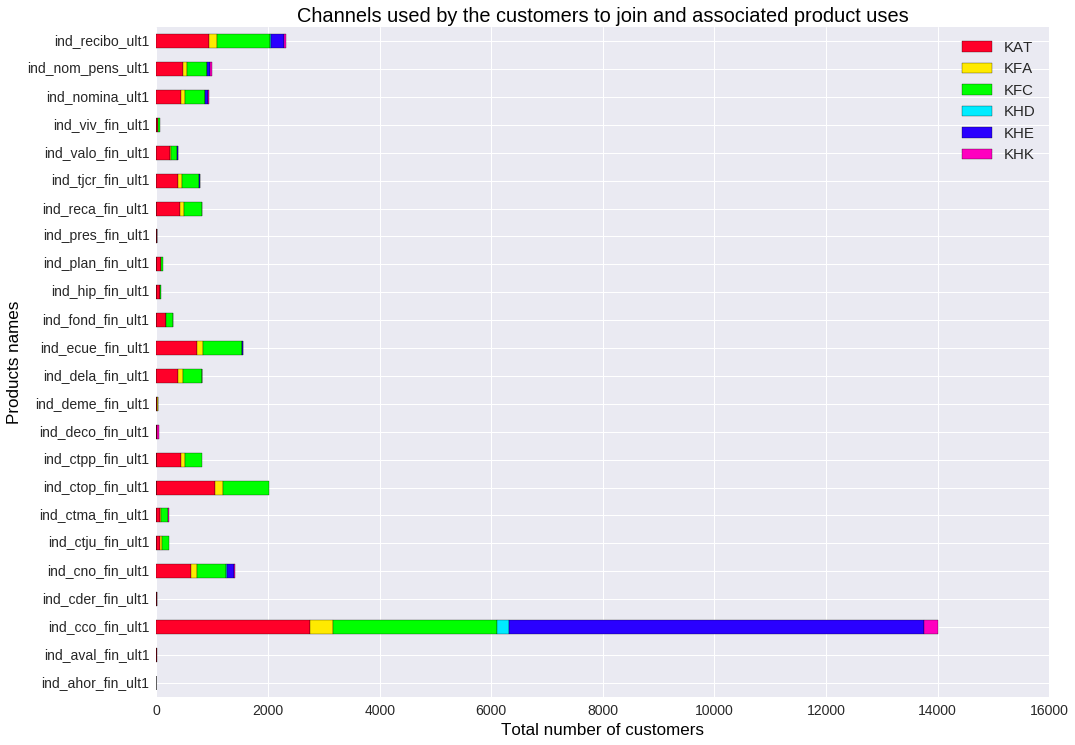

In [185]:
# Channels used by the customer to join and the purchased products
ntrain_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_rainbow')
plt.title('Channels used by the customers to join and associated product uses', fontsize=20, color='black') 
plt.xlabel('Total number of customers', fontsize=17, color='black') 
plt.ylabel('Products names', fontsize=17, color='black') 
plt.legend(prop={'size':15}) 

Current acounts are dominant !

Let's remove them and replot ..

In [186]:
exclude = ['ind_cco_fin_ult1']
ntrain_a = ntrain_a.T
ntrain_a = ntrain_a.drop(exclude, axis=1).T

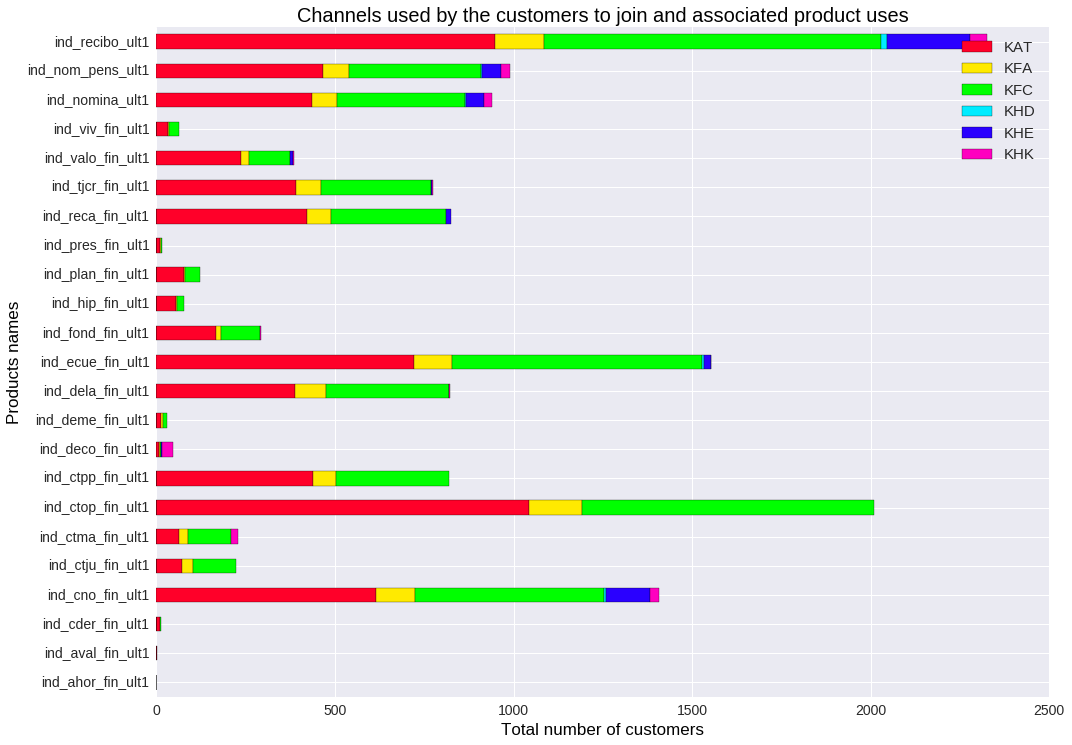

In [187]:
# Channels used by the customer to join and the purchased products
ntrain_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_rainbow')
plt.title('Channels used by the customers to join and associated product uses', fontsize=20, color='black') 
plt.xlabel('Total number of customers', fontsize=17, color='black') 
plt.ylabel('Products names', fontsize=17, color='black') 
plt.legend(prop={'size':15}) 

The effect of the rest of the products become obvious ! .. 

especially, ind_recibo_ult1 (direct debt) and ind_ctop_fin_ult1 (particular account) .. 

 ## Number of products by customer seniority:

In [188]:
ntrain_a = ntrain.groupby(['antiguedad'])['tot_products'].agg('sum') 
ntrain_a

antiguedad
1.0        3072
      3       3
      4      45
      5     163
      6     150
      7     182
      8     435
      9     542
     10     799
     11     269
     12     734
     13     136
     14      99
     15      76
     16     185
     17      96
     18     127
     19     128
     20     247
     21     491
     22     456
     23     385
     24     264
     25     142
     26     135
     27     169
     28      94
     29     105
     30     163
     31     209
           ... 
    216      37
    217      30
    218      51
    219      36
    220      26
    221      43
    222      22
    223      43
    224      29
    225      30
    226      27
    227      12
    228      45
    229      25
    230      13
    231      29
    232      27
    233       1
    234      30
    235      33
    236      33
    237      39
    238      23
    239       9
    240      25
    241      23
    242      21
    244       5
    245       1
    246      11
Name: tot_pro

again .. this is meaningless for a numerical values column .. 

Let's extract the most effective columns for this relationship  (grouping the data into intervals) .. 

In [ ]:
ntrain_a = ntrain.loc[:, ['antiguedad']].join(ntrain.loc[:, 'ind_ahor_fin_ult1':'ind_recibo_ult1'])
ntrain_a.head()

,antiguedad,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
93,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
92,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
91,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
90,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
# Customers' seniority distribution of each product
ntrain_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_rainbow')
plt.title('Customers seniority distribution of each product', fontsize=20, color='black') 
plt.xlabel('Customer seniority', fontsize=17, color='black') 
plt.ylabel('Product names', fontsize=17, color='black') 
plt.legend([[0, 50], [50, 100], [100, 150], [150, 200], [200, inf]], prop={'size':15}) 

## Counting number of  products for individual customer in any month:

In [ ]:
# Extract total number of products 
ntrain_a = ntrain["tot_products"].value_counts()
ntrain_a = pd.DataFrame(ntrain_a)
ntrain_a

In [ ]:
ntrain["ncodpers"].count()

In [ ]:
# calculate the percentage of customers using different number of products
count = ntrain["ncodpers"].count()
ntrain_a["percentage"] = (ntrain_a["tot_products"]/count)*100
ntrain_a

The above table indicated the percentage of each product out of the total ..

In [ ]:
ntrain_a.percentage.plot(kind = 'pie', autopct='%1.1f%%')
plt.title("Percentage of total number of products per customer")

About 65.5% of the customers have used only one type of products .. while 16.4% use 2 type of products .. etc.

## In case of total products = 0:

In [ ]:
ntrain_a = ntrain[ntrain["tot_products"]==0] ## only one product 
ntrain_a

About 23817 customers have no products at any month .. 
They might be inactive customers .. 

Let's see their activity index

In [ ]:
ntrain_a["ind_actividad_cliente"].value_counts() 

Only 1095 of them are active customers .. 

I wonder what other activities they might do insead of purchasing bank products !! :S

In [ ]:
ntrain_a_active = ntrain_a[ntrain_a["ind_actividad_cliente"] == 1]
ntrain_a_active

In [ ]:
## double check .. summarize puchasing behavior 

ntrain_a_ = ntrain_a_active.loc[:, ["tot_products"]].join(ntrain_a_active.loc[:, "ind_ahor_fin_ult1":"ind_recibo_ult1"])
ntrain_a_

In [ ]:
ntrain_a_ = ntrain_a_.groupby("tot_products").agg("sum")
ntrain_a_ = ntrain_a_.T  ## better visualization .. 
ntrain_a_

Yup .. 

They didn't have any products .. 

Yet, it is questionable how they are customers without having any products ! :S

## In case of total products = 1:

In [ ]:
ntrain_a = ntrain[ntrain["tot_products"]==1] ## only one product 
ntrain_a = ntrain_a[ntrain_a["ind_cco_fin_ult1"]==1]  ## this product has to be current account (max usage) 
ntrain_a

In [ ]:
## how many customer have current account 

a = ntrain_a["ncodpers"].count() # equivilent to saying len(ntrain_a) 
c = len(ntrain[ntrain["tot_products"]==1]) # Observations where customers had only one account

In [ ]:
res1 = (c/float(len(ntrain)))*100
res2 = (a/float(len(ntrain)))*100

In [ ]:
print("%.2f" % (res1), "% of the customers had purchased only one product")
print("%.2f" % (res2), "% of the customers had the current account as the only one product")
print("%.2f" % ((res2/res1)*100), "% of the customers when they have only one product, this product is the current account")

What is the percentage of the customers who have only one product other than the current account .. 

In [ ]:
res3 = res1 - res2
print ("%.2f" % res3, "% of the customers have only one account being not the current account") 

## Plots: 

Let's plot the previous conclusion to show the number of times each product is chosen as the only one product .. 

In [ ]:
## extract the necessary columns .. 
ntrain_a = ntrain[ntrain["tot_products"]==1]  # cases where the total products is one

ntrain_a = ntrain_a.loc[:, ["tot_products"]].join(ntrain_a.loc[:, "ind_ahor_fin_ult1":"ind_recibo_ult1"]) 
ntrain_a

## Comment:

We have only 600000+ row instead of 1000000 .. as these are only the customers who use 1st product ! .. 

In [ ]:
ntrain_a = ntrain_a.groupby("tot_products").agg("sum")
ntrain_a

In [ ]:
ntrain_a = ntrain_a.T

There are no customers use ind_nomina_ult1 (payroll) as their unique product .. 

The same observation applied on ind_aval_fin_ult1 variable (bank Guarantees) ..

In [ ]:
ntrain_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='winter')
plt.title('Number of times each product was chosen as the only product in case of the total products is one', fontsize=20) 
plt.xlabel('times of occurences', fontsize=17, color='black') 
plt.ylabel('products names', fontsize=17, color='black')

## Same conclusion ! .. 
The majority of the customers use current account as their only one product at any single month .. followed by ind_ctop_fin_ult1 (particular Account)

In [ ]:
# percentage of each product contribution of those customers who only purchased one product in any month
a = ntrain_a[1]  ##count
b = ntrain_a[1].sum() ## sum of this count 
c = (a/b)*100  # percentage of each product 
c = c.sort_values(ascending=False)
c

Now, let's analyze the case of two products .. 

## If total products = 2 .. 

In [ ]:
# extract those customers who purchased two products with current account being one of them
ntrain_a = ntrain[ntrain["tot_products"]==2]  
ntrain_a

In [ ]:
## current account has to be one of them ! 
ntrain_a = ntrain_a[ntrain_a["ind_cco_fin_ult1"]==1] 
ntrain_a

In [ ]:
## let's plot .. 

# extract the necessary columns
ntrain_a = ntrain_a.loc[:, ["tot_products"]].join(ntrain_a.loc[:, "ind_ahor_fin_ult1":"ind_recibo_ult1"])
ntrain_a

In [ ]:
ntrain_a = ntrain_a.groupby("tot_products").agg("sum")
ntrain_a = ntrain_a.T  ## necessary for the plotting .. 
ntrain_a

Make sense ! :) ..

The products that have not been used by any customer as unique products .. still have not got any customers in case of two products ! .. 

In [ ]:
ntrain_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='winter')
plt.title('Number of times each product was chosen along with the dominant product in case of the total products is two', fontsize=20) 
plt.xlabel('times of occurences', fontsize=17, color='black') 
plt.ylabel('products names', fontsize=17, color='black') 

- The majority of the customers use current accounts as one of their two products 

- Along with the current account .. particular account is chosen .. followed by direct debt .. 

- We might conclude that if we analyze the case of having three bank products .. we gonna have association between the above three products (current accounts, particular accounts and direct debt)

Now let's calc the percentage of each product in case two products are purchased .. 

In [ ]:
# percentage of each product contribution of those customers who purchased two products in any month
a = ntrain_a[2]
b = ntrain_a[2].sum()
c = (a/b)*100
c = c.sort_values(ascending=False)
c

Wow ! .. 

- In case two products are purchased .. 50% of the customers consider current account as one of them ..
- About 17.99% of them combine current account with particular account ..
- And 12.09% of them use debt with their current accounts ..



### Now let's check the products share of different cases:
total products: only one product, two products, three products .. etc

In [ ]:
# Categorize by total products
ntrain_a = ntrain.loc[:, ["tot_products"]].join(ntrain.loc[:, "ind_ahor_fin_ult1":"ind_recibo_ult1"]) 
ntrain_a = ntrain_a.groupby("tot_products").agg("sum")
ntrain_a = ntrain_a.T
ntrain_a.head()

We have single custonmer who use ind_cno_fin_ult1 as one of his 15 products .. 

and their are 280 use it as one of thier 11 products .. etc 

It makes sense to have zeros in case zero products are used (1st column) ! .. 

## Drivers of customers choices: 

Let's check the driving variables .. this is independent of the number of used products .. hence, expecting to be 1000000 records .. 

In [11]:
ntrain_a = ntrain.loc[:, ['age']].join(ntrain.loc[:, 'ind_ahor_fin_ult1':'ind_recibo_ult1'])
ntrain_a = (ntrain_a.groupby(pd.cut(ntrain_a['age'], [0,18,25,35,45,55, pd.np.inf], right=False)).sum()) ## dicretize the age groups for more readability .. 

There are about 126091 customers within the age group of 0 to 18 who are divided between the 25 poducts .. i.e. 3 pf them have ind_cco_fin_ult1 product, about 10398 have ind_ctju_fin_ult1 product ... etc.

## Let's plot the age as a driving variable .. 

In [12]:
del ntrain_a["age"]
ntrain_a = ntrain_a.T

KeyError: 'age'

In [13]:
# ntrain_a = ntrain_a.T
# ntrain_a

TypeError: only length-1 arrays can be converted to Python scalars

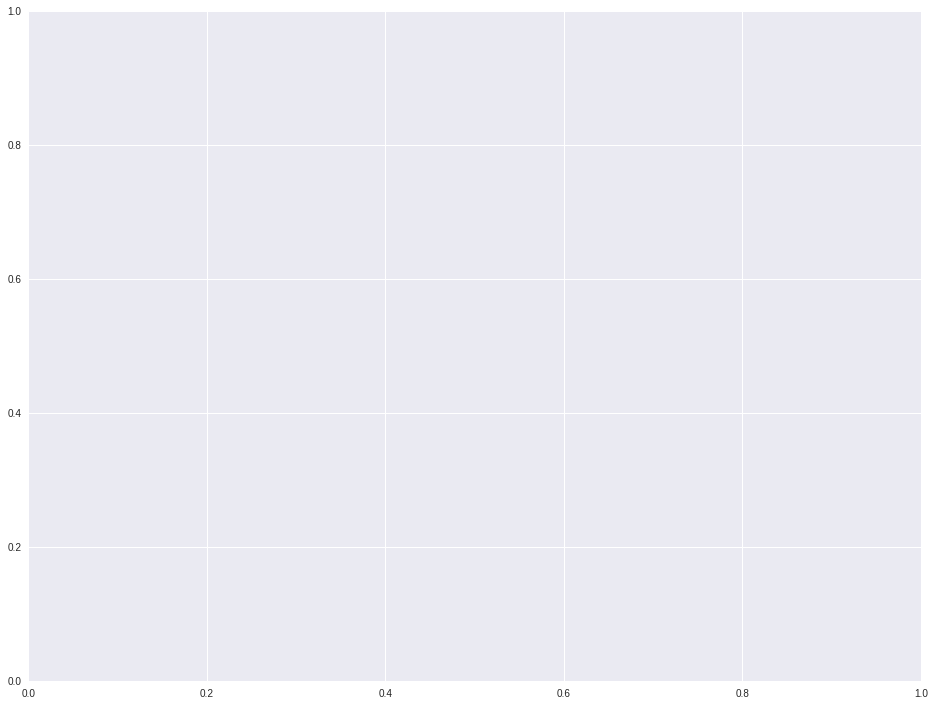

In [14]:
# # Customers age distribution of each product
ntrain_a = ntrain_a.T
ntrain_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_rainbow')
plt.title('Customers age distribution of each product', fontsize=20, color='black') 
plt.xlabel('Total number of customers', fontsize=17, color='black') 
plt.ylabel('Products names', fontsize=17, color='black') 
plt.legend([[0, 18], [18, 25], [25, 35], [35, 45], [45, 55], [55, pd.np.inf]], prop={'size':15}) 

Age group from 0 to 18 use single product .. however the age group of 45 to 55 utilize most of the products .. 

## 1. Distribution of products by age:
a function to calculate the mean of age and the sum of other columns

In [ ]:
# ntrain_a = ntrain.loc[:,["age"]].join(ntrain.loc[:, 'ind_ahor_fin_ult1':'ind_recibo_ult1'])

In [ ]:
fnc = {c:'sum' for c in ntrain_a.columns.drop(['age']).tolist()}
     ...: fnc['age'] = 'mean'
     ...:

In [ ]:
ntrain_a = ntrain_a.groupby('age').agg(fnc).reindex_axis(ntrain_a.columns.drop('age'), 1) 

In [ ]:
ntrain_a

In [ ]:
# Products distribution by age
ntrain_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,42], colormap='hsv')
plt.title('Products distribution by age', fontsize=20, color='black') 
plt.xlabel('Total number of customers', fontsize=17, color='black') 
plt.ylabel('Age (years)', fontsize=17, color='black') 
plt.legend(prop={'size':15}) 

## 2. Distribution of products by segments:

In [15]:
ntrain_a = ntrain.loc[:, ['segmento']].join(ntrain.loc[:, 'ind_ahor_fin_ult1':'ind_recibo_ult1'])

In [16]:
ntrain_a = ntrain_a.groupby("segmento").agg("sum")
ntrain_a = ntrain_a.T

In [17]:
ntrain_a.head()

segmento,01 - TOP,02 - PARTICULARES,03 - UNIVERSITARIO
ind_ahor_fin_ult1,10,102,0
ind_aval_fin_ult1,10,17,0
ind_cco_fin_ult1,26339,371857,394459
ind_cder_fin_ult1,78,348,5
ind_cno_fin_ult1,12782,60982,13725


- There are about 26339 of the top customers purchase current account (ind_cco_fin_ult1) and about 371857 of the 2nd segement purchase it and finally 394459 of those who purchase current account belong to the 3rd segment. 

- The gap between number of customers who have current account and i.e. ind_aval_fin_ult1 (bank Guarantees) is obvious .. 

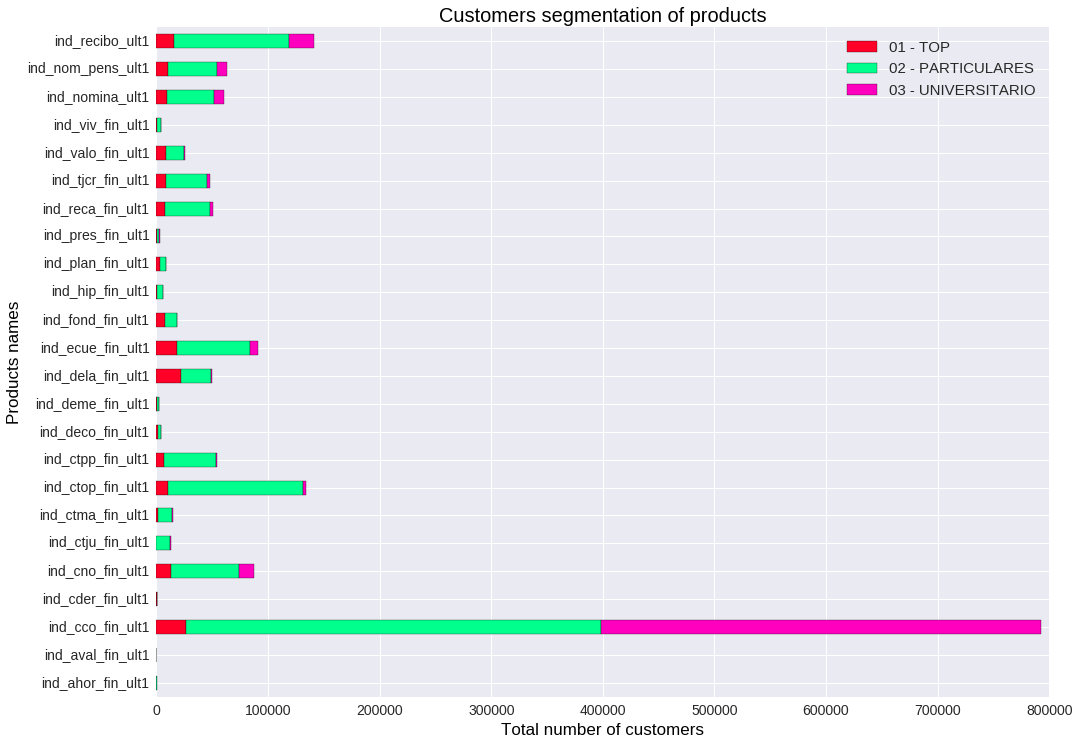

In [18]:
# Customers segment of each product
ntrain_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_rainbow')
plt.title('Customers segmentation of products', fontsize=20, color='black') 
plt.xlabel('Total number of customers', fontsize=17, color='black') 
plt.ylabel('Products names', fontsize=17, color='black') 
plt.legend(prop={'size':15}) 

- The 2nd segment (particulars) is utilized in most of the products ..
- It is obvious that the current account is the most popular product followed by particular Account then Direct Debit .. 
- Let's remove current account and re-plot .. 

In [19]:
# excluding the dominant product 
exclude = ['ind_cco_fin_ult1']
ntrain_a = ntrain_a.T
ntrain_a = ntrain_a.drop(exclude, axis=1).T

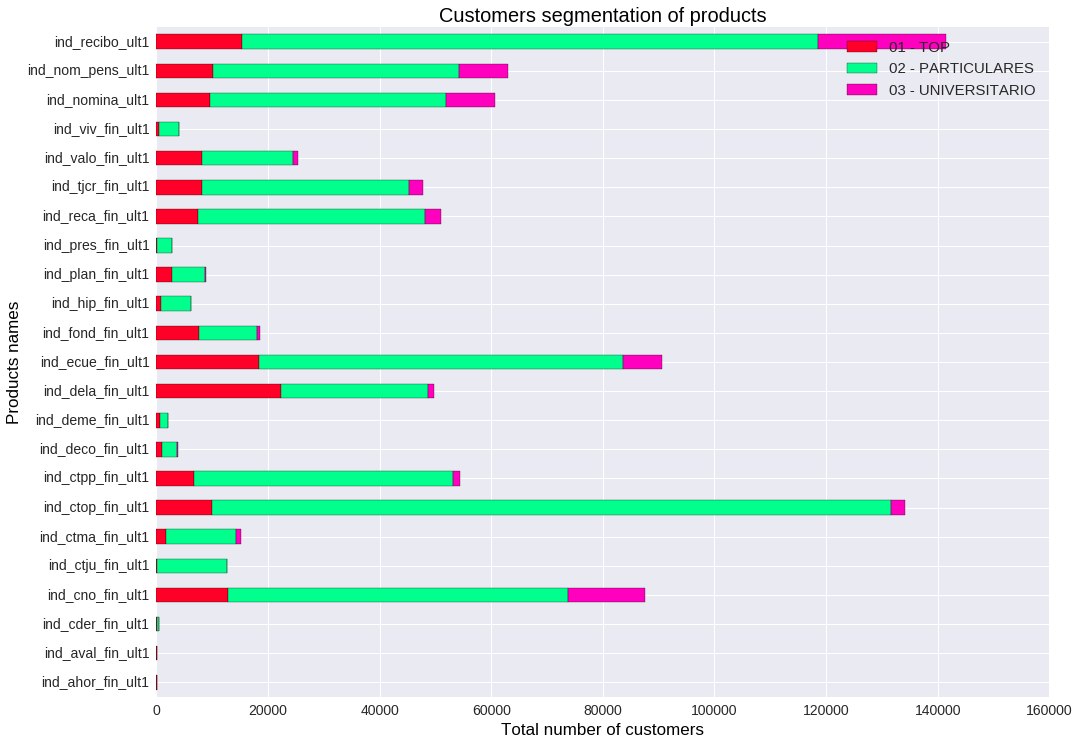

In [20]:
# Customers segment of each product
ntrain_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_rainbow')
plt.title('Customers segmentation of products', fontsize=20, color='black') 
plt.xlabel('Total number of customers', fontsize=17, color='black') 
plt.ylabel('Products names', fontsize=17, color='black') 
plt.legend(prop={'size':15}) 

Particular accounts and direct debit still dominant but the gap between the products purchasements is shrinked ..

## 3. Distribution of products by activity index: 
Whether these customers are active (1) / inactive (0) .. 

In [21]:
ntrain_a = ntrain.loc[:, ['ind_actividad_cliente']].join(ntrain.loc[:, 'ind_ahor_fin_ult1':'ind_recibo_ult1'])

In [22]:
ntrain_a = ntrain_a.groupby("ind_actividad_cliente").agg("sum")
ntrain_a = ntrain_a.T

In [23]:
ntrain_a.head()

ind_actividad_cliente,0.0,1.0
ind_ahor_fin_ult1,36,76
ind_aval_fin_ult1,0,27
ind_cco_fin_ult1,400729,391949
ind_cder_fin_ult1,44,387
ind_cno_fin_ult1,1726,85764


Although ind_aval_fin_ult1 (Guarantees) has few number of customers .. all of them are active .. 

This is differs from current account that attract the majority of customers however almost half of them are inactive ! ..

It seems that the activity index do not have an impact on the current and particular accounts.

Let's plot the above findings for better demonestration ..

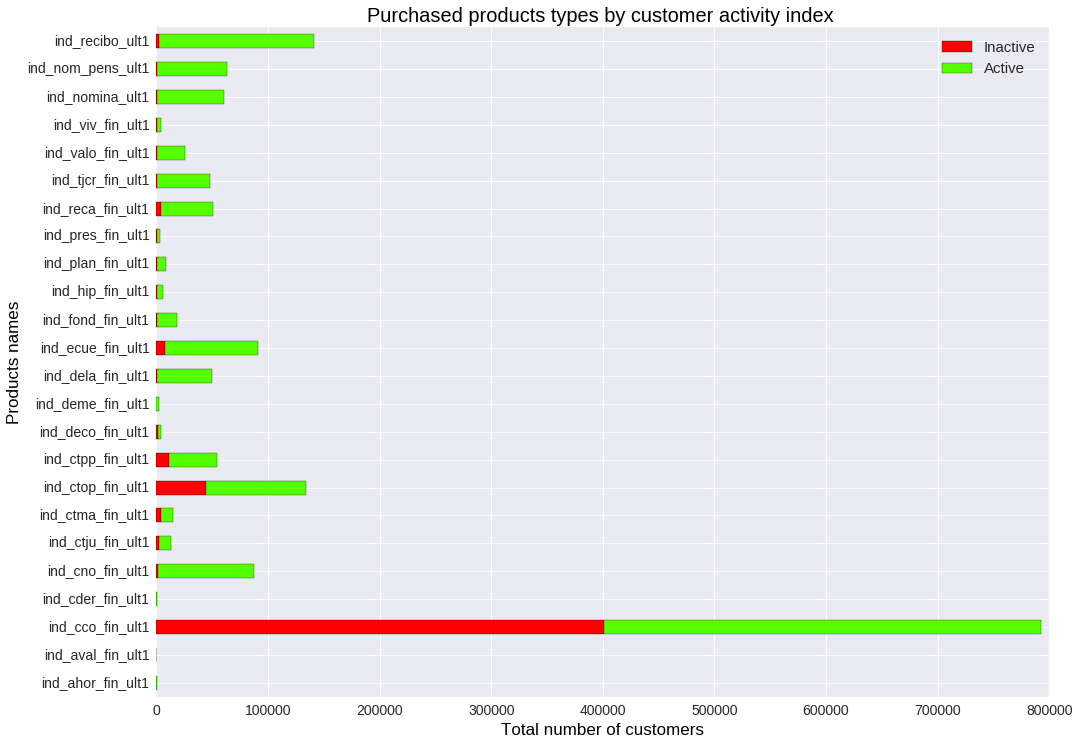

In [24]:
# Purchased products types by customer activity index
ntrain_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='prism')
plt.title('Purchased products types by customer activity index ', fontsize=20, color='black') 
plt.xlabel('Total number of customers', fontsize=17, color='black') 
plt.ylabel('Products names', fontsize=17, color='black') 
plt.legend(["Inactive", "Active"], prop={'size':15}) 

## 3. Distribution of products by sex:

In [25]:
ntrain_a = ntrain.loc[:, ['sexo']].join(ntrain.loc[:, 'ind_ahor_fin_ult1':'ind_recibo_ult1'])

In [26]:
ntrain_a = ntrain_a.groupby("sexo").agg("sum")
ntrain_a = ntrain_a.T

In [27]:
ntrain_a.head()

sexo,H,V
ind_ahor_fin_ult1,30,82
ind_aval_fin_ult1,8,19
ind_cco_fin_ult1,380171,412505
ind_cder_fin_ult1,64,367
ind_cno_fin_ult1,36223,51267


The majority of those who purchase the above products are females .. 

Let's plot the whole products to confirm ! .. 

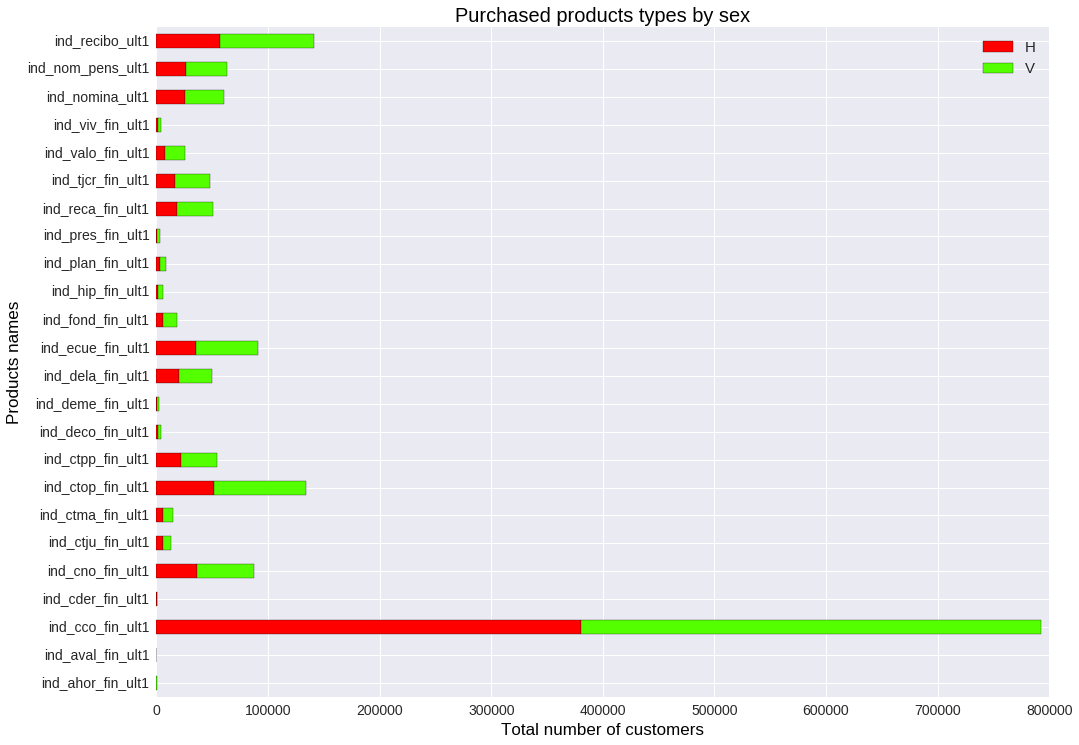

In [32]:
# Purchased products types by customer activity index
ntrain_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='prism')
plt.title('Purchased products types by sex', fontsize=20, color='black') 
plt.xlabel('Total number of customers', fontsize=17, color='black') 
plt.ylabel('Products names', fontsize=17, color='black') 
plt.legend(["H", "V"], prop={'size':15}) 

Confirmed ! :D .. 

The females own the majority of the products ..

## Wait a minute ! .. 

Yet, we are working on just a sample of the data .. the biasness above might be becuase -by chance- the number if females in the selected samples is greater then the males ! 

let's double check .. 

In [33]:
ntrain.sexo.value_counts()

V    529343
H    462407
Name: sexo, dtype: int64

Let's calculate the portion of males .. 

In [44]:
a = float(ntrain["ncodpers"][ntrain["sexo"]=="H"].count())
b = float(ntrain["ncodpers"][ntrain["sexo"]=="V"].count())
res = a/b
print("The ratio between females to males in the sample data is: ", "%.2f" % res)

('The ratio between females to males in the sample data is: ', '0.87')


This means that about 87% of the data are females ..

## The effect of seniority, income and age on the total number of products:

In [97]:
ntrain_a = ntrain.loc[:, ['renta', 'age', 'antiguedad']].join(ntrain.loc[:, 'ind_ahor_fin_ult1':'tot_products'])

In [98]:
ntrain_a.head()

,renta,age,antiguedad,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,...,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,tot_products
0,112939.56,61,22,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,91032.78,47,22,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
2,89907.72,26,22,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,NaN,22,22,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,54691.29,22,22,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [99]:
ntrain_a = ntrain_a.dropna(axis=0)

In [100]:
ntrain_a = ntrain_a.groupby("tot_products").agg("mean")

In [101]:
ntrain_b = ntrain_a.loc[:, ['renta', 'age', 'antiguedad']]

In [102]:
ntrain_b.head()

,renta,age,antiguedad
tot_products,,,
0,142658.192286,NaN,NaN
1,122034.930672,NaN,NaN
2,140972.105739,NaN,NaN
3,146939.292512,NaN,NaN
4,151611.947248,NaN,NaN


NAs in age and seniority probably becuase the cells inside them are seen as strings not numerical values .. let's convert them to numeric ..

In [103]:
type(ntrain.age)
ntrain['age'] = ntrain['age'].convert_objects(convert_numeric=True)
type(ntrain.age)

pandas.core.series.Series

In [105]:
type(ntrain.antiguedad)
ntrain['antiguedad'] = ntrain['antiguedad'].convert_objects(convert_numeric=True)
type(ntrain.antiguedad)

pandas.core.series.Series

In [108]:
ntrain_a = ntrain.loc[:, ['renta', 'age', 'antiguedad']].join(ntrain.loc[:, 'ind_ahor_fin_ult1':'tot_products'])
ntrain_a.head()

,renta,age,antiguedad,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,...,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,tot_products
0,112939.56,61,22,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,91032.78,47,22,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
2,89907.72,26,22,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,NaN,22,22,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,54691.29,22,22,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Let's remove NAs to be able to calc. mean values .. 

In [109]:
ntrain_a = ntrain_a.dropna(axis=0)

In [110]:
ntrain_a = ntrain_a.groupby("tot_products").agg("mean")
ntrain_a.head()

,renta,age,antiguedad,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
tot_products,,,,,,,,,,,,,,,,,,,,,
0,142658.192286,49.585376,68.653165,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,122034.930672,34.066786,54.341609,0.000043,0.000000,0.853208,0.000045,0.009216,0.020794,0.007169,...,0.000734,0.001923,0.001647,0.006885,0.002675,0.001762,0.000790,0.000000,0.000011,0.002259
2,140972.105739,47.772965,94.400041,0.000139,0.000000,0.905633,0.000620,0.043333,0.000474,0.033103,...,0.001393,0.005359,0.006008,0.039367,0.019024,0.024084,0.005359,0.000612,0.002384,0.249384
3,146939.292512,47.959077,105.033180,0.000389,0.000000,0.797032,0.001482,0.181200,0.000185,0.039034,...,0.010856,0.019952,0.003631,0.131014,0.107005,0.092017,0.013876,0.096111,0.103262,0.378203
4,151611.947248,46.486558,106.348741,0.000555,0.000065,0.559632,0.001927,0.440140,0.000000,0.028811,...,0.017803,0.031882,0.002777,0.211740,0.203966,0.112665,0.015974,0.321236,0.335674,0.656224


In [111]:
ntrain_b = ntrain_a.loc[:, ['renta', 'age', 'antiguedad']]
ntrain_b.head()

,renta,age,antiguedad
tot_products,,,
0,142658.192286,49.585376,68.653165
1,122034.930672,34.066786,54.341609
2,140972.105739,47.772965,94.400041
3,146939.292512,47.959077,105.033180
4,151611.947248,46.486558,106.348741


## Total number of products by customer seniority: 

In [115]:
ntrain_a = ntrain_b["antiguedad"][0:15]  

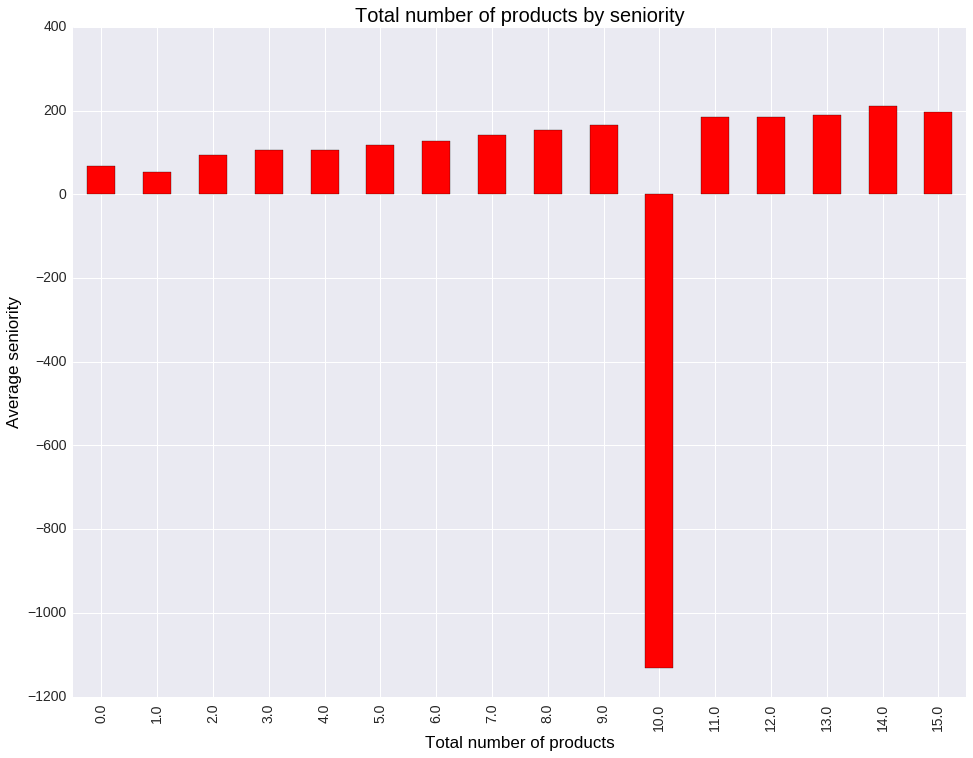

In [116]:
# Total number of products by seniority
ntrain_a.plot(kind='bar', fontsize=14, figsize=[16,12], colormap='prism')
plt.title('Total number of products by seniority', fontsize=20, color='black') 
plt.xlabel('Total number of products', fontsize=17, color='black') 
plt.ylabel('Average seniority', fontsize=17, color='black')  

The average number of products in case of 10 products is negative ! .. it might be typo or outlier ! :S .. 

Let's show this numerically .. 

then we  either plot only the 1st 9 products .. or ignore the products with negative number of seniority and re-plot

In [117]:
ntrain_b

,renta,age,antiguedad
tot_products,,,
0,142658.192286,49.585376,68.653165
1,122034.930672,34.066786,54.341609
2,140972.105739,47.772965,94.400041
3,146939.292512,47.959077,105.033180
4,151611.947248,46.486558,106.348741
5,149127.831421,46.392361,117.147321
6,160695.740018,46.639237,128.108525
7,160586.445840,46.906015,141.576754
8,168570.096335,47.642914,153.428944


let's plot only the 1st 9 products .. 

In [127]:
ntrain_a = ntrain_b["antiguedad"][0:9]

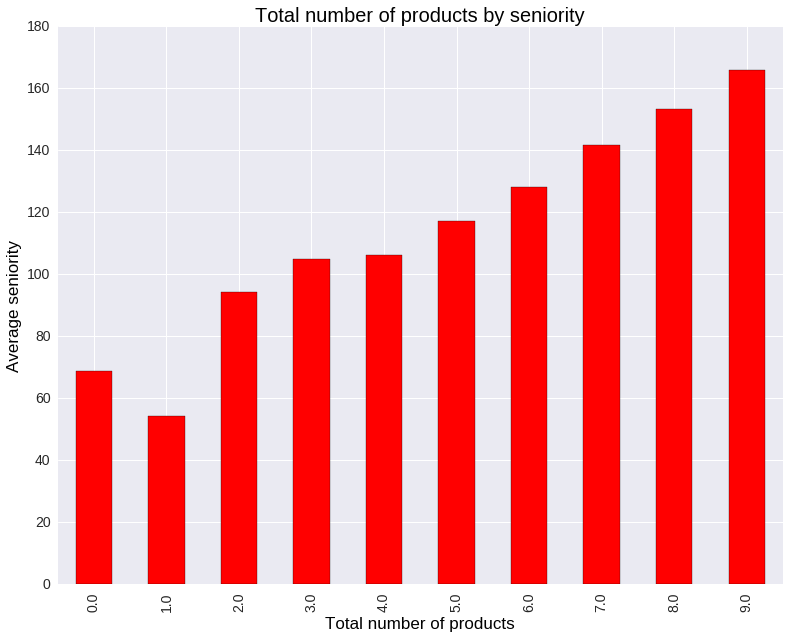

In [137]:
# Total number of products by seniority
ntrain_a.plot(kind='bar', fontsize=14, figsize=[13,10], colormap='prism')
plt.title('Total number of products by seniority', fontsize=20, color='black') 
plt.xlabel('Total number of products', fontsize=17, color='black') 
plt.ylabel('Average seniority', fontsize=17, color='black')  

In [134]:
dropped_ = ntrain_b["antiguedad"][0:9].append(ntrain_b["antiguedad"][11:15])
dropped_

tot_products
0      68.653165
1      54.341609
2      94.400041
3     105.033180
4     106.348741
5     117.147321
6     128.108525
7     141.576754
8     153.428944
9     165.952880
11    183.690299
12    184.521739
13    188.937500
14    210.333333
15    197.000000
Name: antiguedad, dtype: float64

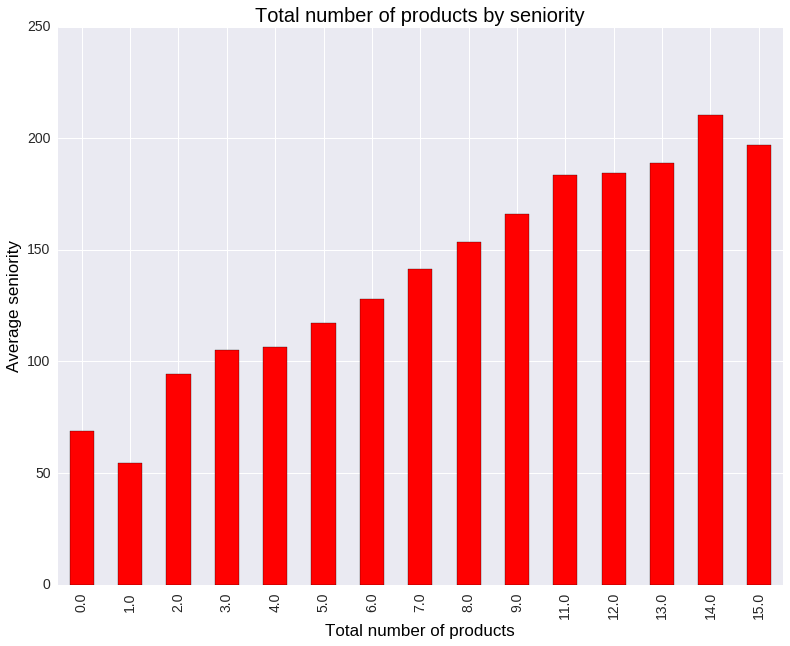

In [136]:
# Total number of products by seniority
dropped_.plot(kind='bar', fontsize=14, figsize=[13,10], colormap='prism')
plt.title('Total number of products by seniority', fontsize=20, color='black') 
plt.xlabel('Total number of products', fontsize=17, color='black') 
plt.ylabel('Average seniority', fontsize=17, color='black')  

We cannot confidently say the as long as the average seniority increases, the number of products increases (not positively correlated) ! .. 

However the +ve correlation is clear in case of plotting the first 9 products (except for those who have not got any products)

## 2. Total number of products by age:

In [138]:
ntrain_a = ntrain_b["age"]

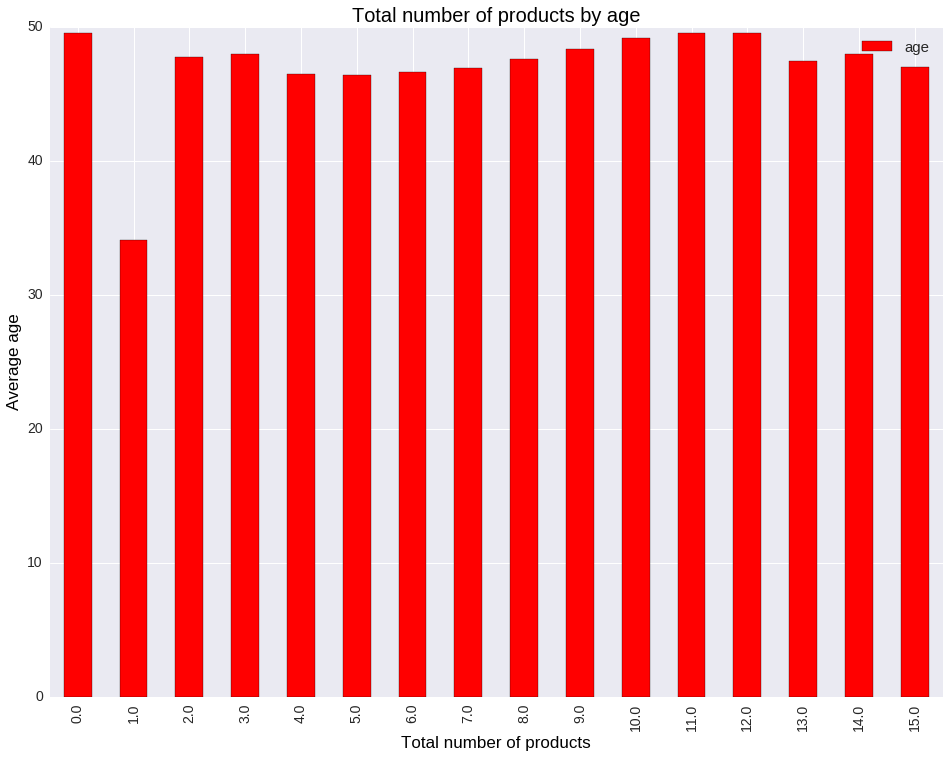

In [139]:
# Total number of products by age
ntrain_a.plot(kind='bar', fontsize=14, figsize=[16,12], colormap='prism')
plt.title('Total number of products by age', fontsize=20, color='black') 
plt.xlabel('Total number of products', fontsize=17, color='black') 
plt.ylabel('Average age', fontsize=17, color='black') 
plt.legend(prop={'size':15}) 

Again, no obvious positive correlation between avg. age and number of products ..

## 3. Total number of products by income:

In [140]:
ntrain_a = ntrain_b["renta"]

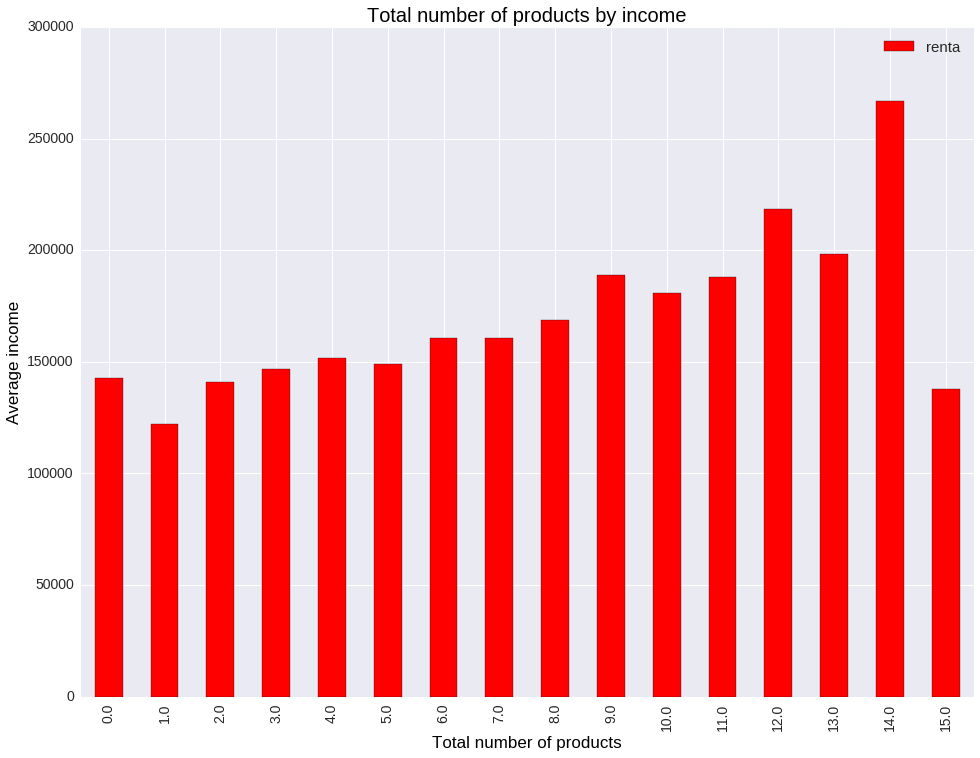

In [141]:
ntrain_a.plot(kind='bar', fontsize=14, figsize=[16,12], colormap='prism')
plt.title('Total number of products by income', fontsize=20, color='black') 
plt.xlabel('Total number of products', fontsize=17, color='black') 
plt.ylabel('Average income', fontsize=17, color='black') 
plt.legend(prop={'size':15})

Those who have the highest average income own 14 number of products .. 

## Story telling:

From the previous exploration .. we can conclude the following:
1. From 25 products, the highest number of puchasements goes for current accounts followed by particular accounts then debits  
2. Among 23 independent variables, Age, income and customer seniority belong to the most important indictors .. 
3. There is no guarantee that sex has great effect as it suffers from sample bias (the majority of the data belongs for single type -V-)   
4. The age group of 45 to 55 is the most effective group .. it obtains the majority of the products .. 